## This cell creates the figures from Gilman et al. (2021) "The primordial matter power spectrum on sub-galactic scales"

In [20]:
from lenslikelihood.power_spectra import * 
from lenslikelihood.pk_measurements import *
import matplotlib.pyplot as plt
import numpy as np
import pickle
import matplotlib.cm as cm

plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16

def string_ranges_for_pivot(pivot):
    if pivot == 0.1:
        return '01', [[0.6645, 1.2645], [-0.1, 0.1], [-0.01, 0.01]]
        #return '01', [[0.8645, 1.0645], [-0.08, 0.08], [-0.0085, 0.0085]]
    elif pivot == 0.5:
        return '05', [[0.5145, 1.4145], [-0.18, 0.18], [-0.014, 0.014]]
        #return '05', [[0.6145, 1.3145], [-0.15, 0.15], [-0.012, 0.012]]
    elif pivot == 1:
        return '1', [[0.4645, 1.4645], [-0.2, 0.2], [-0.018, 0.018]]
        #return '1', [[0.4645, 1.4645], [-0.2, 0.2], [-0.018, 0.018]]
    elif pivot == 5:
        return '5', [[0.2645, 1.6645], [-0.26, 0.26], [-0.026, 0.026]]

### Mass funciton and MC relation figures

Note: this cell requires some raw data files that contain tabulated halo mass functions and concentration-mass relations. These data files were too large to upload, so this cell won't run. 

Raw data files for the power spectrum not found.


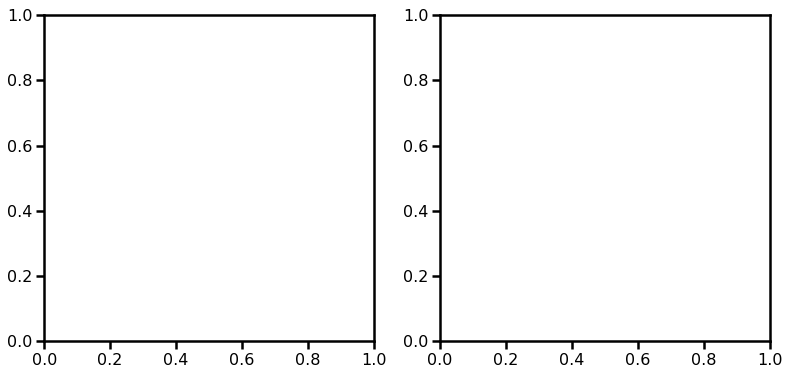

In [22]:
try:
    cmap = cm.brg
    mass_function_model = 'shethTormen'

    pivot = 1.0
    pivot_string, qp_ranges = string_ranges_for_pivot(pivot)
    func = load_interpolated_mapping(mass_function_model, pivot_string)
    lstyle = '-'
    ns = 0.9645

    if pivot == 0.1:
        a_run = [-0.08, -0.06, -0.02, 0., 0.02, 0.06, 0.08]
        brun_1 = -0.008
        brun_2 = 0.008
    elif pivot == 0.5:
        a_run = [-0.12, -0.08, -0.04, 0., 0.04, 0.08, 0.12]
        brun_1 = -0.01
        brun_2 = 0.01
    elif pivot == 1.0:
        a_run = [-0.14, -0.1, -0.04, 0., 0.04, 0.1, 0.14]
        brun_1 = -0.01
        brun_2 = 0.012
    elif pivot == 5:
        a_run = [-0.18, -0.12, -0.06, 0., 0.06, 0.12, 0.18]
        brun_1 = -0.014
        brun_2 = 0.014

    color_norm = len(a_run) * 2

    fig = plt.figure(1)
    fig.set_size_inches(13,6)
    ax1 = plt.subplot(121)
    ax2 = plt.subplot(122)

    for i, arun in enumerate(a_run):

        m, mfunc, mcrel = func.get_dndm_mc(ns, arun, brun_1)
        _, dndm_true, mcrel_true = func.model_from_file(ns, arun, brun_1, 'As', mass_function_model, pivot, z=None)
        logm = np.log10(m)

        if arun < 0:
            lab = r'$a_{\rm{run}} = -$' +str(abs(arun))
        else:
            lab = r'$a_{\rm{run}} = $' +str(abs(arun))
        ax1.loglog(m, m * mfunc, color=cmap((i+1)/color_norm), lw=4.5, linestyle=lstyle, alpha=0.6, label=lab)
        ax1.loglog(m, m * dndm_true, color=cmap((i+1)/color_norm), lw=4.5, linestyle='--', alpha=0.7)
        ax2.loglog(m, mcrel, color=cmap((i+1)/color_norm), lw=4.5, linestyle=lstyle, alpha=0.6)
        ax2.loglog(m, mcrel_true, color=cmap((i+1)/color_norm), lw=4.5, linestyle='--', alpha=0.7)

    ax1.legend(fontsize=14, loc=1, frameon=False)
    ax1.annotate(r'$b_{\rm{run}} = -0.01$'+'\n'+r'$n_s = 0.9645$', xy=(0.05, 0.865), xycoords='axes fraction', fontsize=16)
    ax2.annotate(r'$b_{\rm{run}} = -0.01$'+'\n'+r'$n_s = 0.9645$', xy=(0.05, 0.865), xycoords='axes fraction', fontsize=16)

    ymin, ymax = 0.2, 350
    ymin2, ymax2 = 3.0, 200
    ax1.set_xlabel('Halo mass ' + r'$\left[M_{\odot}\right]$', fontsize=16)
    ax2.set_xlabel('Halo mass ' + r'$\left[M_{\odot}\right]$', fontsize=16)
    ax1.set_ylabel(r'$\frac{d^2N}{d \log m \ dV}$', fontsize=22)
    ax2.set_ylabel(r'$c_8$', fontsize=22)
    ax1.set_xlim(10**7, 10**9)
    ax2.set_xlim(10**7, 10**9)
    ax1.set_ylim(ymin, ymax)
    ax2.set_ylim(ymin2, 1e4)

    plt.tight_layout() 
    save_name = './figures_for_paper/mfunc_mcrel_lowbrun_pivot1.pdf'
    plt.savefig(save_name)

    fig = plt.figure(2)
    fig.set_size_inches(13,6)
    ax1 = plt.subplot(121)
    ax2 = plt.subplot(122)

    brun = 0.01
    for i, arun in enumerate(a_run):

        m, mfunc, mcrel = func.get_dndm_mc(ns, arun, brun_2)
        _, dndm_true, mcrel_true = func.model_from_file(ns, arun, brun_2, 'As', mass_function_model, pivot, z=None)
        logm = np.log10(m)

        if arun < 0:
            lab = r'$a_{\rm{run}} = -$' +str(abs(arun))
        else:
            lab = r'$a_{\rm{run}} = $' +str(abs(arun))
        ax1.loglog(m, m * mfunc, color=cmap((i+1)/color_norm), lw=4.5, linestyle=lstyle, alpha=0.6, label=lab)
        ax1.loglog(m, m * dndm_true, color=cmap((i+1)/color_norm), lw=4.5, linestyle='--', alpha=0.7)
        ax2.loglog(m, mcrel, color=cmap((i+1)/color_norm), lw=4.5, linestyle=lstyle, alpha=0.6)
        ax2.loglog(m, mcrel_true, color=cmap((i+1)/color_norm), lw=4.5, linestyle='--', alpha=0.7)

    ax1.legend(fontsize=14, loc=1, frameon=False)
    ax1.annotate(r'$b_{\rm{run}} = $'+str(brun_1)+'\n'+r'$n_s = 0.9645$', xy=(0.05, 0.865), xycoords='axes fraction', fontsize=16)
    ax2.annotate(r'$b_{\rm{run}} = $'+str(brun_2)+'\n'+r'$n_s = 0.9645$', xy=(0.05, 0.865), xycoords='axes fraction', fontsize=16)
    ymin, ymax = 0.2, 350
    ymin2, ymax2 = 3.0, 1e4
    ax1.set_xlabel('Halo mass ' + r'$\left[M_{\odot}\right]$', fontsize=16)
    ax2.set_xlabel('Halo mass ' + r'$\left[M_{\odot}\right]$', fontsize=16)
    ax1.set_ylabel(r'$\frac{d^2N}{d \log m \ dV}$', fontsize=22)
    ax2.set_ylabel(r'$c_8$', fontsize=22)
    ax1.set_xlim(10**7, 10**9)
    ax2.set_xlim(10**7, 10**9)
    ax1.set_ylim(ymin, ymax)
    ax2.set_ylim(ymin2, ymax2)
    plt.tight_layout() 
    save_name = './figures_for_paper/mfunc_mcrel_highbrun_pivot1'+'.pdf'
    plt.savefig(save_name)
except:
    print('Raw data files for the power spectrum not found.')

### Load lensing likelihood

In [23]:
from lenslikelihood.measurements import *
from lenslikelihood.sampling import InterpolatedLikelihood
import dill
from trikde.pdfs import DensitySamples, IndepdendentLikelihoods, MultivariateNormalPriorHyperCube, CustomPriorHyperCube
from trikde.triangleplot import TrianglePlot

def couple_mass_functions(samples, sigma_sub_theory, coupling_strength=0.2):
    
    delta_los_samples = samples[:, 0]
    sigma_sub_samples = samples[:, -1]
    delta_sigma_sub = sigma_sub_samples/sigma_sub_theory
    chi2 = (delta_sigma_sub - delta_los_samples)**2/coupling_strength**2 
    return chi2

nbins = 20
param_names = ['LOS_normalization', 'beta', 'log10c0', 'delta_power_law_index', 'sigma_sub']
param_ranges = [all_param_ranges_version2[name] for name in param_names]
load_from_pickle = True 
save_to_pickle = False 

filename_extension = '_joint_logprior'
base_path = './../lenslikelihood/precomputed_likelihoods/'
lensing_likelihoods = []
for lens in all_lens_names:
    fname = base_path + lens + filename_extension
    print('loading joint likelihoods for lens '+lens+' ...')
    f = open(fname, 'rb')
    single_lens_likelihood = dill.load(f)
    f.close()
    lensing_likelihoods.append(single_lens_likelihood)
    
lensing_likelihood = IndepdendentLikelihoods(lensing_likelihoods)
interpolated_lens_likelihood_noprior = InterpolatedLikelihood(lensing_likelihood, param_names, param_ranges)

extrapolate_likelihood = True
sigma_sub_theory = 0.05
kwargs_prior = {'sigma_sub_theory': sigma_sub_theory}
prior_on_mass_functions = CustomPriorHyperCube(couple_mass_functions, param_names, param_ranges, nbins, kwargs_prior)

lensing_likelihood_w = IndepdendentLikelihoods(lensing_likelihoods + [prior_on_mass_functions])
interpolated_lens_likelihood = InterpolatedLikelihood(lensing_likelihood_w, param_names, param_ranges, extrapolate=extrapolate_likelihood)

loading joint likelihoods for lens HE0435 ...
loading joint likelihoods for lens WGD2038 ...
loading joint likelihoods for lens B1422 ...
loading joint likelihoods for lens WFI2033 ...
loading joint likelihoods for lens PSJ1606 ...
loading joint likelihoods for lens WFI2026 ...
loading joint likelihoods for lens RXJ0911 ...
loading joint likelihoods for lens MG0414 ...
loading joint likelihoods for lens PG1115 ...
loading joint likelihoods for lens RXJ1131 ...
loading joint likelihoods for lens WGDJ0405 ...


### Lensing likelihood figures

No prior that couples the LOS mass function to subhalo mass function

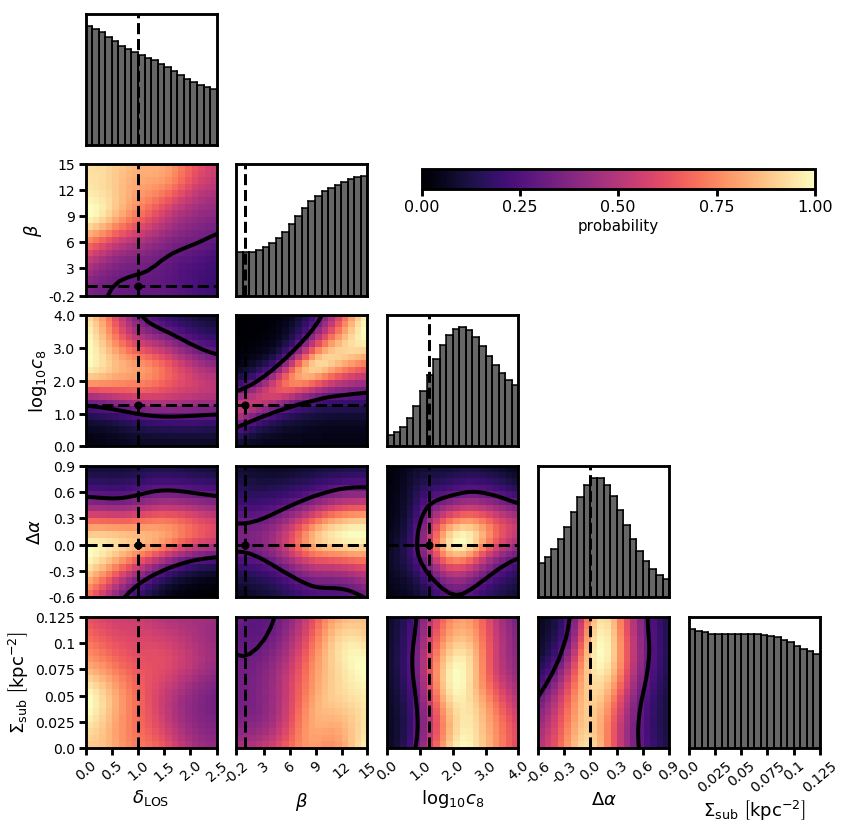

In [36]:
fig = plt.figure()
cmap = 'magma'
triangle_plot = TrianglePlot([lensing_likelihood])
triangle_plot.set_cmap(cmap, marginal_col='k')
triangle_plot.truth_color = 'k'
truths = {'sigma_sub': 1.05, 'LOS_normalization': 1., 'beta': 0.85, 'log10c0': np.log10(18.5), 'delta_power_law_index': 0.}
axes = triangle_plot.make_triplot(filled_contours=False, show_intervals=False, contour_alpha=1.,
                                  contour_colors=['k', 'k'],
                                  show_contours=True, contour_levels=[0.32], truths=truths)

beta = r'$\beta$'
beta_ticks = [-0.2, 3, 6, 9, 12, 15]
c0 = r'$\log_{10} c_8$'
c0_ticks = [0., 1.0, 2.0, 3.0, 4.0]
delta_power_law_index = r'$\Delta \alpha$'
dpli_ticks = [-0.6, -0.3, 0., 0.3, 0.6, 0.9]
sigma_sub = r'$\Sigma_{\rm{sub}} \ \left[\rm{kpc^{-2}}\right]$'
sigma_sub_ticks = [0., 0.025, 0.05, 0.075, 0.1, 0.125]
delta_LOS = r'$\delta_{\rm{LOS}}$'
dlos_ticks = [0.0, 0.5, 1., 1.5, 2., 2.5]
ticksize = 14
labelsize = 18
rotation = 40

axes[5].set_ylabel(beta, fontsize=labelsize)
axes[5].set_yticks(beta_ticks)
axes[5].set_yticklabels(beta_ticks, fontsize=ticksize)

axes[10].set_ylabel(c0, fontsize=labelsize)
axes[10].set_yticks(c0_ticks)
axes[10].set_yticklabels(c0_ticks, fontsize=ticksize)

axes[15].set_ylabel(delta_power_law_index, fontsize=labelsize)
axes[15].set_yticks(dpli_ticks)
axes[15].set_yticklabels(dpli_ticks, fontsize=ticksize)

axes[20].set_ylabel(sigma_sub, fontsize=labelsize)
axes[20].set_yticks(sigma_sub_ticks)
axes[20].set_yticklabels(sigma_sub_ticks, fontsize=ticksize)

axes[20].set_xlabel(delta_LOS, fontsize=labelsize)
axes[20].set_xticks(dlos_ticks)
axes[20].set_xticklabels(dlos_ticks, fontsize=ticksize, rotation=rotation)

axes[21].set_xlabel(beta, fontsize=labelsize)
axes[21].set_xticks(beta_ticks)
axes[21].set_xticklabels(beta_ticks, fontsize=ticksize, rotation=rotation)

axes[22].set_xlabel(c0, fontsize=labelsize)
axes[22].set_xticks(c0_ticks)
axes[22].set_xticklabels(c0_ticks, fontsize=ticksize, rotation=rotation)


axes[23].set_xlabel(delta_power_law_index, fontsize=labelsize)
axes[23].set_xticks(dpli_ticks)
axes[23].set_xticklabels(dpli_ticks, fontsize=ticksize, rotation=rotation)

axes[24].set_xlabel(sigma_sub, fontsize=labelsize)
axes[24].set_xticks(sigma_sub_ticks)
axes[24].set_xticklabels(sigma_sub_ticks, fontsize=ticksize, rotation=rotation)

from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

ax_idx = 9
axins1 = inset_axes(axes[ax_idx],
                    width="300%",  # width = 50% of parent_bbox width
                    height="15%",  # height : 5%
                    loc='upper right')
empty = np.zeros((20, 20))
empty[0,0] = 1

im1 = axes[ax_idx].imshow(empty, interpolation='None', cmap=cmap)
cb = fig.colorbar(im1, cax=axins1, orientation="horizontal", ticks=[0, 0.25, 0.5, 0.75, 1])
axes[ax_idx].set_visible(False)
cb.set_label('probability', fontsize=15)

save_name = './figures_for_paper/lensing_likelihood.pdf'
plt.savefig(save_name)


### Lensing likelihood figures

Including a prior

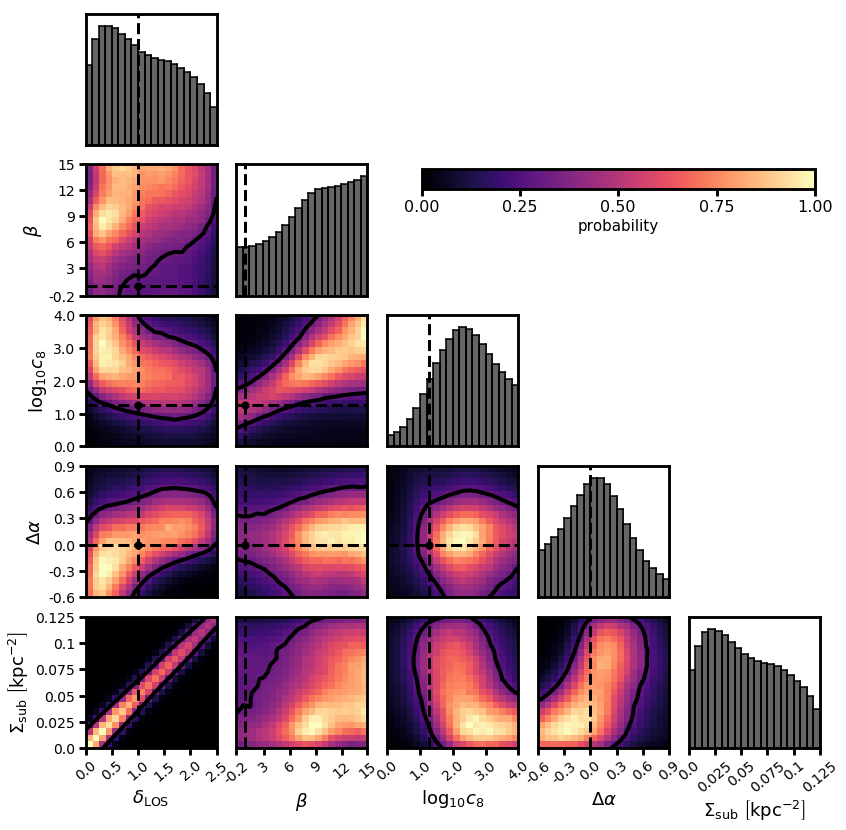

In [32]:
fig = plt.figure()
triangle_plot = TrianglePlot([lensing_likelihood_w])
triangle_plot.set_cmap(cmap, marginal_col='k')
triangle_plot.truth_color = 'k'

display_params=['LOS_normalization', 'beta', 'log10c0', 'delta_power_law_index']
display_params = None
truths= {'sigma_sub': 1.05, 'LOS_normalization': 1., 'beta': 0.85, 'log10c0': np.log10(18.5), 'delta_power_law_index': 0.}
axes = triangle_plot.make_triplot(filled_contours=False, show_intervals=False, show_contours=True,
                                  contour_levels=[0.32], contour_colors=['k', 'k'], display_params=display_params,
                                 truths=truths)

axes[5].set_ylabel(beta, fontsize=labelsize)
axes[5].set_yticks(beta_ticks)
axes[5].set_yticklabels(beta_ticks, fontsize=ticksize)

axes[10].set_ylabel(c0, fontsize=labelsize)
axes[10].set_yticks(c0_ticks)
axes[10].set_yticklabels(c0_ticks, fontsize=ticksize)

axes[15].set_ylabel(delta_power_law_index, fontsize=labelsize)
axes[15].set_yticks(dpli_ticks)
axes[15].set_yticklabels(dpli_ticks, fontsize=ticksize)

axes[20].set_ylabel(sigma_sub, fontsize=labelsize)
axes[20].set_yticks(sigma_sub_ticks)
axes[20].set_yticklabels(sigma_sub_ticks, fontsize=ticksize)

axes[20].set_xlabel(delta_LOS, fontsize=labelsize)
axes[20].set_xticks(dlos_ticks)
axes[20].set_xticklabels(dlos_ticks, fontsize=ticksize, rotation=rotation)

axes[21].set_xlabel(beta, fontsize=labelsize)
axes[21].set_xticks(beta_ticks)
axes[21].set_xticklabels(beta_ticks, fontsize=ticksize, rotation=rotation)

axes[22].set_xlabel(c0, fontsize=labelsize)
axes[22].set_xticks(c0_ticks)
axes[22].set_xticklabels(c0_ticks, fontsize=ticksize, rotation=rotation)


axes[23].set_xlabel(delta_power_law_index, fontsize=labelsize)
axes[23].set_xticks(dpli_ticks)
axes[23].set_xticklabels(dpli_ticks, fontsize=ticksize, rotation=rotation)

axes[24].set_xlabel(sigma_sub, fontsize=labelsize)
axes[24].set_xticks(sigma_sub_ticks)
axes[24].set_xticklabels(sigma_sub_ticks, fontsize=ticksize, rotation=rotation)

# axes[4].set_ylabel(beta, fontsize=labelsize)
# axes[4].set_yticks(beta_ticks)
# axes[4].set_yticklabels(beta_ticks, fontsize=ticksize)

# axes[8].set_ylabel(c0, fontsize=labelsize)
# axes[8].set_yticks(c0_ticks)
# axes[8].set_yticklabels(c0_ticks, fontsize=ticksize)

# axes[12].set_ylabel(delta_power_law_index, fontsize=labelsize)
# axes[12].set_yticks(dpli_ticks)
# axes[12].set_yticklabels(dpli_ticks, fontsize=ticksize)

# axes[12].set_xlabel(delta_LOS, fontsize=labelsize)
# axes[12].set_xticks(dlos_ticks)
# axes[12].set_xticklabels(dlos_ticks, fontsize=ticksize, rotation=rotation)

# axes[13].set_xlabel(beta, fontsize=labelsize)
# axes[13].set_xticks(beta_ticks)
# axes[13].set_xticklabels(beta_ticks, fontsize=ticksize, rotation=rotation)

# axes[14].set_xlabel(c0, fontsize=labelsize)
# axes[14].set_xticks(c0_ticks)
# axes[14].set_xticklabels(c0_ticks, fontsize=ticksize, rotation=rotation)

# axes[15].set_xlabel(delta_power_law_index, fontsize=labelsize)
# axes[15].set_xticks(dpli_ticks)
# axes[15].set_xticklabels(dpli_ticks, fontsize=ticksize, rotation=rotation)

#axes[2].annotate(r'$\Sigma_{\rm{sub(predicted)}} = 0.05 \rm{kpc^{-2}}$', fontsize=22,
#                xy=(0.26, 0.1), xycoords='axes fraction')
ax_idx = 9
axins1 = inset_axes(axes[ax_idx],
                    width="300%",  # width = 50% of parent_bbox width
                    height="15%",  # height : 5%
                    loc='upper right')
empty = np.zeros((20, 20))
empty[0,0] = 1

im1 = axes[ax_idx].imshow(empty, interpolation='None', cmap=cmap)
cb = fig.colorbar(im1, cax=axins1, orientation="horizontal", ticks=[0, 0.25, 0.5, 0.75, 1])
axes[ax_idx].set_visible(False)
cb.set_label('probability', fontsize=15)

save_name = './figures_for_paper/lensing_likelihood_w.pdf'
plt.savefig(save_name)


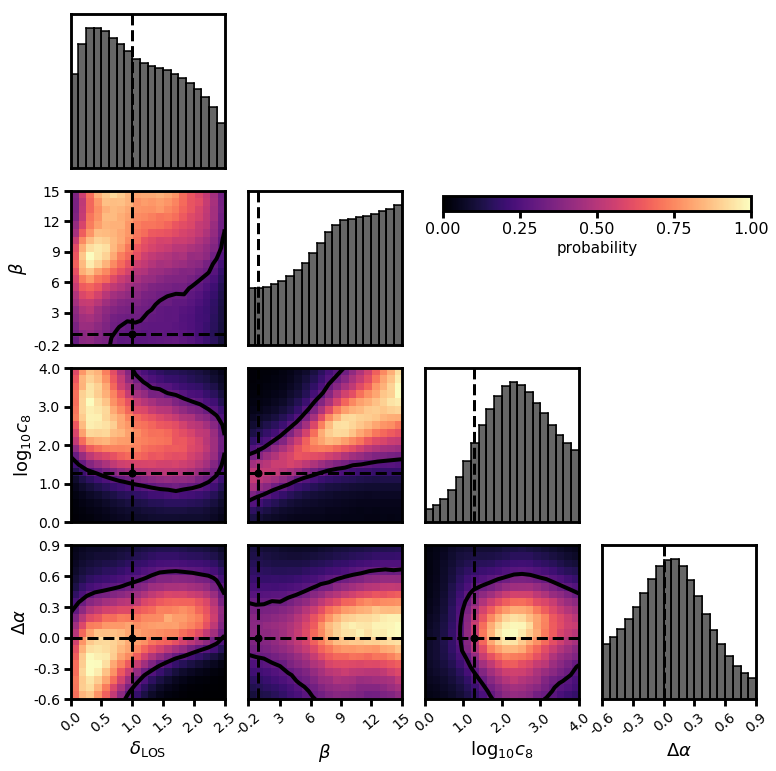

In [33]:
fig = plt.figure()
triangle_plot = TrianglePlot([lensing_likelihood_w])
triangle_plot.set_cmap(cmap, marginal_col='k')
triangle_plot.truth_color = 'k'

display_params=['LOS_normalization', 'beta', 'log10c0', 'delta_power_law_index']
truths= {'sigma_sub': 1.05, 'LOS_normalization': 1., 'beta': 0.85, 'log10c0': np.log10(18.5), 'delta_power_law_index': 0.}
axes = triangle_plot.make_triplot(filled_contours=False, show_intervals=False, show_contours=True,
                                  contour_levels=[0.32], contour_colors=['k', 'k'], display_params=display_params,
                                 truths=truths)

axes[4].set_ylabel(beta, fontsize=labelsize)
axes[4].set_yticks(beta_ticks)
axes[4].set_yticklabels(beta_ticks, fontsize=ticksize)

axes[8].set_ylabel(c0, fontsize=labelsize)
axes[8].set_yticks(c0_ticks)
axes[8].set_yticklabels(c0_ticks, fontsize=ticksize)

axes[12].set_ylabel(delta_power_law_index, fontsize=labelsize)
axes[12].set_yticks(dpli_ticks)
axes[12].set_yticklabels(dpli_ticks, fontsize=ticksize)

axes[12].set_xlabel(delta_LOS, fontsize=labelsize)
axes[12].set_xticks(dlos_ticks)
axes[12].set_xticklabels(dlos_ticks, fontsize=ticksize, rotation=rotation)

axes[13].set_xlabel(beta, fontsize=labelsize)
axes[13].set_xticks(beta_ticks)
axes[13].set_xticklabels(beta_ticks, fontsize=ticksize, rotation=rotation)

axes[14].set_xlabel(c0, fontsize=labelsize)
axes[14].set_xticks(c0_ticks)
axes[14].set_xticklabels(c0_ticks, fontsize=ticksize, rotation=rotation)

axes[15].set_xlabel(delta_power_law_index, fontsize=labelsize)
axes[15].set_xticks(dpli_ticks)
axes[15].set_xticklabels(dpli_ticks, fontsize=ticksize, rotation=rotation)

# axes[2].annotate(r'$\Sigma_{\rm{sub(predicted)}} = 0.05 \rm{kpc^{-2}}$', fontsize=22,
#                xy=(0.26, 0.1), xycoords='axes fraction')
ax_idx = 7
axins1 = inset_axes(axes[ax_idx],
                    width="200%",  # width = 50% of parent_bbox width
                    height="10%",  # height : 5%
                    loc='upper right')
empty = np.zeros((20, 20))
empty[0,0] = 1

im1 = axes[ax_idx].imshow(empty, interpolation='None', cmap=cmap)
cb = fig.colorbar(im1, cax=axins1, orientation="horizontal", ticks=[0, 0.25, 0.5, 0.75, 1])
axes[ax_idx].set_visible(False)
cb.set_label('probability', fontsize=15)

save_name = './figures_for_paper/lensing_likelihood_w_v2.pdf'
plt.savefig(save_name)


In [34]:
ndraw = 60000
compute = False
if compute:
    joint_log10c8_deltaalpha_samples = np.empty((ndraw, 2))
    count = 0
    while count < ndraw:
        sample_LOS = np.random.normal(1., 0.2)
        sample_beta = np.random.normal(0.8, 0.3)
        sample_log10c8 = np.random.uniform(0, 4)
        sample_delta_alpha = np.random.uniform(-0.6, 0.9)
        sample_sigma_sub = np.random.uniform(0, 0.1)
        p = (sample_LOS, sample_beta, sample_log10c8, sample_delta_alpha,  sample_sigma_sub)
        try:
            like = interpolated_lens_likelihood_noprior(p)
        except:
            continue
        if like > np.random.rand():
            joint_log10c8_deltaalpha_samples[count, 0] = sample_log10c8
            joint_log10c8_deltaalpha_samples[count, 1] = sample_delta_alpha
            count += 1
            if count % 1000 ==0:
                print(count)

    np.savetxt('joint_log10c8_deltaalpha_samples.txt', X=joint_log10c8_deltaalpha_samples)

parameter name:  log10c0
68% confidence intervals: 
format: median (lower, upper) (param_min, param_max)

SAMPLES 1:
1.3329853294362495 (0.7675636099609475, 1.8933362571736612)
width:  1.1257726472127136
parameter name:  log10c0
68% confidence intervals: 
format: median (lower, upper) (param_min, param_max)

SAMPLES 1:
1.32120647325405 (0.2431757345465484, 2.578284433634133)
width:  2.3351086990875847
parameter name:  delta_power_law_index
68% confidence intervals: 
format: median (lower, upper) (param_min, param_max)

SAMPLES 1:
0.07100317484073099 (-0.2705423592889854, 0.46281737369854825)
width:  0.7333597329875337
parameter name:  delta_power_law_index
68% confidence intervals: 
format: median (lower, upper) (param_min, param_max)

SAMPLES 1:
0.07342003254681206 (-0.5034309541136961, 0.7986771232038957)
width:  1.302108077317592


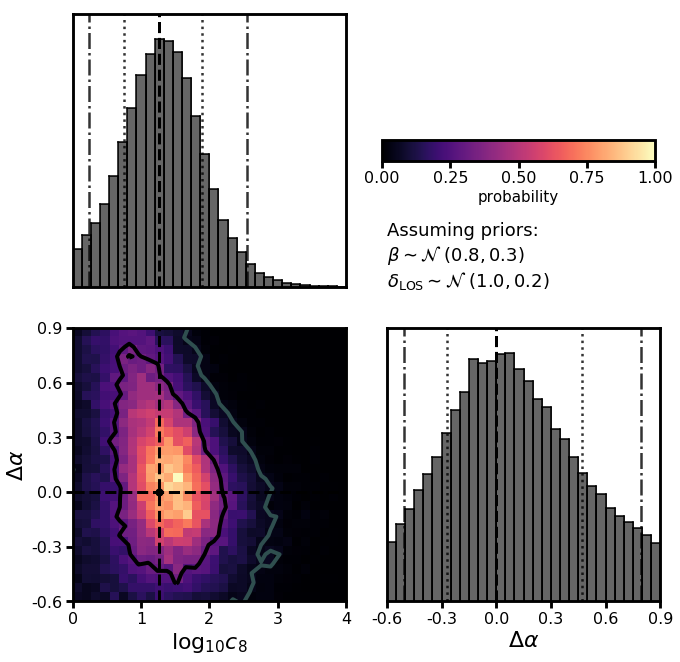

In [37]:
param_names_joint = ['log10c0', 'delta_power_law_index']
param_ranges_joint = [[0, 4], [-0.6, 0.9]]

joint_log10c8_deltaalpha_samples = np.loadtxt('joint_log10c8_deltaalpha_samples.txt')

nbins = 30
pdf = DensitySamples([joint_log10c8_deltaalpha_samples], param_names_joint, None, param_ranges_joint, bandwidth_scale=0.1,
                 nbins=nbins, use_kde=False, samples_width_scale=3)
joint_likelihood = IndepdendentLikelihoods([pdf])
triangle_plot = TrianglePlot([joint_likelihood])
triangle_plot.set_cmap(cmap, marginal_col='k')
triangle_plot.truth_color = 'k'
triangle_plot.show_intervals_68 = True
truths= {'sigma_sub': 1.05, 'LOS_normalization': 1., 'beta': 0.8, 'log10c0': np.log10(18.5), 'delta_power_law_index': 0.}
axes = triangle_plot.make_triplot(filled_contours=False, show_intervals=True, show_contours=True,
                                  contour_levels=[0.05, 0.32, 1.], 
                                 truths=truths)

triangle_plot.get_parameter_confidence_interval('log10c0', 1)
triangle_plot.get_parameter_confidence_interval('log10c0', 2)
triangle_plot.get_parameter_confidence_interval('delta_power_law_index', 1)
triangle_plot.get_parameter_confidence_interval('delta_power_law_index', 2)

axes[2].set_xticks([0., 1., 2, 3, 4])
axes[2].set_xticklabels([0, 1, 2, 3, 4], fontsize=16)
axes[3].set_xticks([-0.6, -0.3, 0., 0.3, 0.6, 0.9])
axes[3].set_xticklabels([-0.6, -0.3, 0., 0.3, 0.6, 0.9], fontsize=16)
axes[2].set_yticks([-0.6, -0.3, 0., 0.3, 0.6, 0.9])
axes[2].set_yticklabels([-0.6, -0.3, 0., 0.3, 0.6, 0.9], fontsize=16)
axes[2].set_xlabel(c0, fontsize=22)
axes[2].set_ylabel(delta_power_law_index, fontsize=22)
axes[3].set_xlabel(delta_power_law_index, fontsize=22)

ax_idx = 1
axins1 = inset_axes(axes[ax_idx],
                    width="100%",  # width = 50% of parent_bbox width
                    height="7.5%",  # height : 5%
                    loc=7)
empty = np.zeros((20, 20))
empty[0,0] = 1
im1 = axes[ax_idx].imshow(empty, interpolation='None', cmap=cmap)
cb = fig.colorbar(im1, cax=axins1, orientation="horizontal", ticks=[0, 0.25, 0.5, 0.75, 1])
axes[ax_idx].set_visible(False)
cb.set_label('probability', fontsize=15)
axes[3].annotate('Assuming priors:\n'+r'$\beta \sim \mathcal{N} \ \left(0.8, 0.3\right)$'+'\n'+r'$\delta_{\rm{LOS}} \sim \mathcal{N} \ \left(1.0, 0.2\right)$', 
                 xy=(0., 1.15), xycoords='axes fraction', fontsize=18)
plt.tight_layout()
save_name = './figures_for_paper/joint_inference_c8_deltaalpha.pdf'
plt.savefig(save_name)

### $q_P$ likelihoods

Load the precomputed likelihoods for the power spectrum parameters. See other notebooks for the actual (time-consuming) computation

In [38]:
def string_ranges_for_pivot(pivot):
    if pivot == 0.1:
        return '01', [[0.6645, 1.2645], [-0.1, 0.1], [-0.01, 0.01]]
        #return '01', [[0.8645, 1.0645], [-0.08, 0.08], [-0.0085, 0.0085]]
    elif pivot == 0.5:
        return '05', [[0.5145, 1.4145], [-0.18, 0.18], [-0.014, 0.014]]
        #return '05', [[0.6145, 1.3145], [-0.15, 0.15], [-0.012, 0.012]]
    elif pivot == 1:
        return '1', [[0.4645, 1.4645], [-0.2, 0.2], [-0.018, 0.018]]
        #return '1', [[0.4645, 1.4645], [-0.2, 0.2], [-0.018, 0.018]]
    elif pivot == 5:
        return '5', [[0.2645, 1.6645], [-0.26, 0.26], [-0.026, 0.026]]
    
mass_function_model_list = ['shethTormen', 'bhattacharya2011', 'rodriguezPuebla2016']
param_names_pk = [r'$n_s$', r'$a_{\rm{run}}$', r'$b_{\rm{run}}$']
pivots = [0.1, 0.5, 1, 5]

qp_likelihoods_dict_pivot01 = {}
qp_likelihoods_dict_pivot05 = {}
qp_likelihoods_dict_pivot1 = {}
qp_likelihoods_dict_pivot5 = {}

idx_mfunc_model = 0

for mfunc_model in mass_function_model_list:   
    
    try:
        pivot_string, ranges = string_ranges_for_pivot(pivots[0])
        f = open('./interpolated_pq_likelihoods/Pk_likelihood_'+mfunc_model+'_pivot'+pivot_string, 'rb')
        qp_likelihoods_dict_pivot01[mfunc_model] = pickle.load(f)
        qp_likelihoods_dict_pivot01[mfunc_model+'_ranges'] = ranges
    except:
        pass
    try:
        pivot_string, ranges = string_ranges_for_pivot(pivots[1])
        f = open('./interpolated_pq_likelihoods/Pk_likelihood_'+mfunc_model+'_pivot'+pivot_string, 'rb')
        qp_likelihoods_dict_pivot05[mfunc_model] = pickle.load(f)
        qp_likelihoods_dict_pivot05[mfunc_model+'_ranges'] = ranges
    except:
        pass
    
    try:
        pivot_string, ranges = string_ranges_for_pivot(pivots[2])
        f = open('./interpolated_pq_likelihoods/Pk_likelihood_'+mfunc_model+'_pivot'+pivot_string, 'rb')
        qp_likelihoods_dict_pivot1[mfunc_model] = pickle.load(f)
        qp_likelihoods_dict_pivot1[mfunc_model+'_ranges'] = ranges
    except:
        pass
    
#     pivot_string, ranges = string_ranges_for_pivot(pivots[3])
#     f = open('./interpolated_pq_likelihoods/Pk_likelihood_'+mfunc_model+'_pivot'+pivot_string, 'rb')
#     qp_likelihoods_dict_pivot5[mfunc_model] = pickle.load(f)
#     qp_likelihoods_dict_pivot5[mfunc_model+'_ranges'] = ranges

### Plot the qp likelihood for a given mass function and pivot scale

Just a few examples... 

In [40]:
def qp_likelihood_figure(likelihood, pivot_scale, param_ranges_pk, arun_ticks, brun_ticks, ns_ticks, nbins=20, ndraw=100000,
                        save=False, save_name=''):
      
    qp_samples = likelihood.sample(ndraw)
    density_marginalized = DensitySamples(qp_samples, param_names_pk, None, 
                                     param_ranges_pk, nbins=nbins)
    
    pk_likelihood_marginalized = IndepdendentLikelihoods([density_marginalized])

    triplot = TrianglePlot([pk_likelihood_marginalized])
    triplot.set_cmap(cmap, marginal_col='k')
    triplot.truth_color = 'k'
    truths= {r'$n_s$': 0.9645, r'$a_{\rm{run}}$': 0., r'$b_{\rm{run}}$': 0.}
    axes = triplot.make_triplot(filled_contours=False, show_intervals=False, show_contours=True,
                                      contour_levels=[0.32], contour_colors=['k', 'k'])
    ticksize = 16
    axes[3].set_yticks(arun_ticks)
    axes[3].set_yticklabels(arun_ticks, fontsize=ticksize)

    axes[6].set_yticks(brun_ticks)
    axes[6].set_yticklabels(brun_ticks, fontsize=ticksize)

    axes[6].set_xticks(ns_ticks)
    axes[6].set_xticklabels(ns_ticks, fontsize=ticksize)

    axes[7].set_xticks(arun_ticks)
    axes[7].set_xticklabels(arun_ticks, fontsize=ticksize)

    axes[8].set_xticks(brun_ticks)
    axes[8].set_xticklabels(brun_ticks, fontsize=ticksize)

    ax_idx = 1
    axins1 = inset_axes(axes[ax_idx],
                        width="200%",  # width = 50% of parent_bbox width
                        height="10%",  # height : 5%
                        loc=6)
    empty = np.zeros((20, 20))
    empty[0,0] = 1

    im1 = axes[ax_idx].imshow(empty, interpolation='None', cmap=cmap)
    cb = fig.colorbar(im1, cax=axins1, orientation="horizontal", ticks=[0, 0.25, 0.5, 0.75, 1])
    axes[ax_idx].set_visible(False)
    cb.set_label('probability', fontsize=15)
    axes[6].set_ylabel(r'$b_{\rm{run}}$', fontsize=16, labelpad=-12)
    plt.tight_layout()

    if save:
        pivot_string = string_ranges_for_pivot(pivot_scale)[0]
        save_name = './figures_for_paper/qp_likelihood_'+mfunc_model+'_pivot'+pivot_string+'.pdf'
        plt.savefig(save_name)

sampling.... 10.0%
sampling.... 20.0%
sampling.... 30.0%
sampling.... 40.0%
sampling.... 50.0%
sampling.... 60.0%
sampling.... 70.0%
sampling.... 80.0%
sampling.... 90.0%


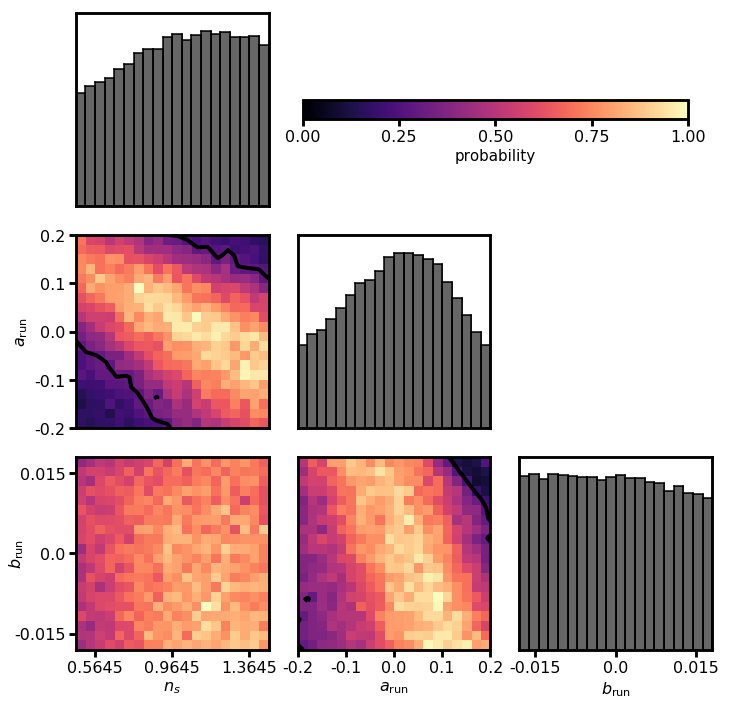

In [41]:
arun_ticks = [-0.2, -0.1, 0.00, 0.1, 0.2]  
brun_ticks = [-0.015, 0.000, 0.015]
ns_ticks = [0.5645, 0.9645, 1.3645]
pivot_scale = 1.0
mfunc_model = 'shethTormen'
likelihood = qp_likelihoods_dict_pivot1[mfunc_model]
param_ranges_pk = qp_likelihoods_dict_pivot1[mfunc_model+'_ranges']
qp_likelihood_figure(likelihood, pivot_scale, param_ranges_pk, arun_ticks, brun_ticks, ns_ticks, save=True)

sampling.... 10.0%
sampling.... 20.0%
sampling.... 30.0%
sampling.... 40.0%
sampling.... 50.0%
sampling.... 60.0%
sampling.... 70.0%
sampling.... 80.0%
sampling.... 90.0%


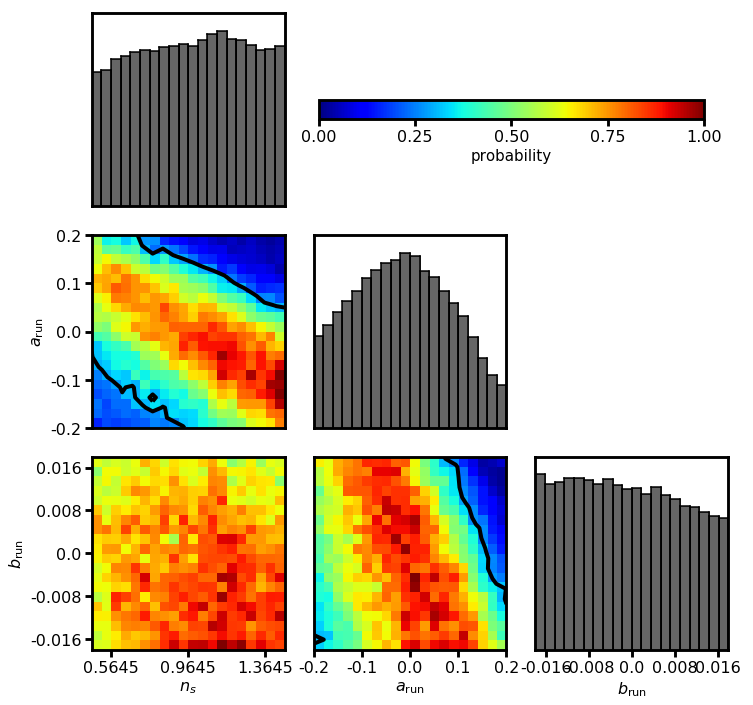

In [11]:
mfunc_model = 'bhattacharya2011'
likelihood = qp_likelihoods_dict_pivot1[mfunc_model]
param_ranges_pk = qp_likelihoods_dict_pivot1[mfunc_model+'_ranges']
qp_likelihood_figure(likelihood, pivot_scale, param_ranges_pk, arun_ticks, brun_ticks, ns_ticks, save=True)

sampling.... 10.0%
sampling.... 20.0%
sampling.... 30.0%
sampling.... 40.0%
sampling.... 50.0%
sampling.... 60.0%
sampling.... 70.0%
sampling.... 80.0%
sampling.... 90.0%


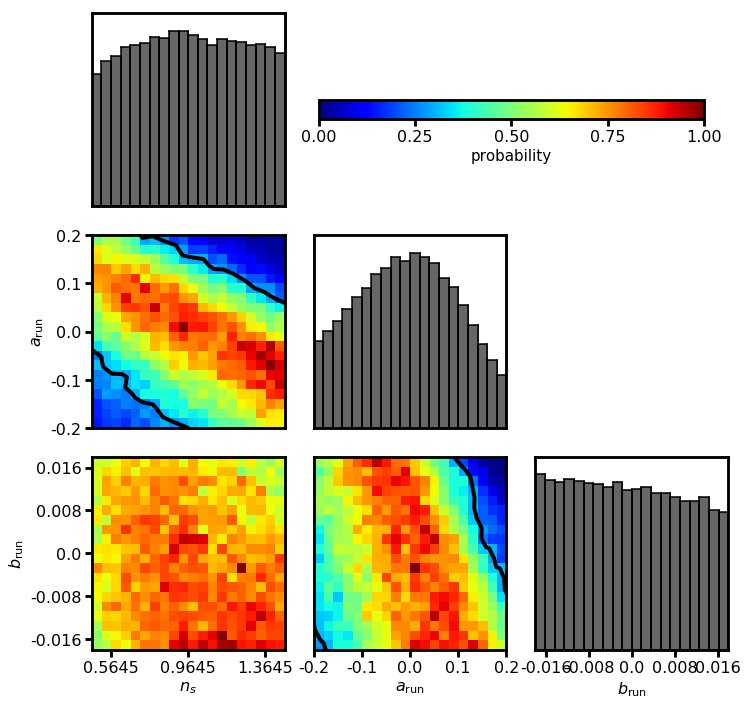

In [12]:
mfunc_model = 'rodriguezPuebla2016'
likelihood = qp_likelihoods_dict_pivot1[mfunc_model]
param_ranges_pk = qp_likelihoods_dict_pivot1[mfunc_model+'_ranges']
qp_likelihood_figure(likelihood, pivot_scale, param_ranges_pk, arun_ticks, brun_ticks, ns_ticks, save=True)

### Plotting routines for mapping between $q_p$ and $q_{\rm{sub}}$ parameters

In [42]:
import os
from matplotlib.lines import Line2D

ticksize_mapping = 17

def load_mapping(mfunc_model, pivot_scale, a_run, ar2_1=-0.012, ar2_2=0.000, ar2_3=0.012):

    c0_1, beta_1, dplawidx_1, losnorm_1 = [], [], [], []
    c0_2, beta_2, dplawidx_2, losnorm_2 = [], [], [], []
    c0_3, beta_3, dplawidx_3, losnorm_3 = [], [], [], []

    pivot_string = string_ranges_for_pivot(pivot_scale)[0]
    fname = os.getenv("HOME") + '/Code/lenslikelihood/notebooks_Pk/interpolated_mappings/mapping_' + mfunc_model + '_pivot'+pivot_string

    f = open(fname, 'rb')
    func = pickle.load(f)
    
    step = 0.05
    ns_values = np.arange(0.9645 - 0.5, 0.9645 + 0.5 + step, step)
    
    for nsi in ns_values:
        (_losnorm, _beta, _c0, _dplawidx) = func(nsi, a_run, ar2_1)
        c0_1.append(_c0)
        beta_1.append(_beta)
        dplawidx_1.append(_dplawidx)
        losnorm_1.append(_losnorm)

        (_losnorm, _beta, _c0, _dplawidx) = func(nsi, a_run, ar2_2)
        c0_2.append(_c0)
        beta_2.append(_beta)
        dplawidx_2.append(_dplawidx)
        losnorm_2.append(_losnorm)

        (_losnorm, _beta, _c0, _dplawidx) = func(nsi, a_run, ar2_3)
        c0_3.append(_c0)
        beta_3.append(_beta)
        dplawidx_3.append(_dplawidx)
        losnorm_3.append(_losnorm)
        
    return ns_values, [c0_1, c0_2, c0_3], [beta_1, beta_2, beta_3], [dplawidx_1, dplawidx_2, dplawidx_3], [losnorm_1, losnorm_2, losnorm_3]
        
def make_c8_mapping_figure(ax, mfunc_model, pivot_scale, arun_values, ar_1, ar_2, ar_3, save=False, save_name=''):

    cmap = cm.brg

    color_norm = 2.0 * len(arun_values)
    leg_1_label = r'$b_{\rm{run}} = -$'+str(abs(ar2_1))
    leg_2_label = r'$b_{\rm{run}} = $'+str(abs(ar2_3))
    custom_lines = [Line2D([0], [0], color='k', lw=5, linestyle='-'), 
                    Line2D([0], [0], color='k', lw=5, linestyle=':')]

    for idx, arun in enumerate(arun_values):
        ns_values, c0values, betavalues, deltaalphavalues, losnormvalues = load_mapping(mfunc_model, pivot_scale, 
                                                                                                    arun, ar2_1, ar2_2, ar2_3) 
        if arun < 0:
            lab = r'$a_{\rm{run}} = -$'+str(np.round(abs(arun), 3))
        else:
            lab = r'$a_{\rm{run}} = $'+str(np.round(arun, 3))
        
        ax.plot(ns_values, c0values[0], color=cmap((idx+1)/color_norm), linestyle='-', lw=3.5, label=lab)
        ax.plot(ns_values, c0values[2], color=cmap((idx+1)/color_norm), linestyle=':', lw=4.5)

    leg1 = ax.legend(fontsize=15, frameon=True)
    ax.legend(custom_lines, [leg_1_label, leg_2_label], fontsize=16, frameon=True, loc=(0.45, 0.82))
    ax.add_artist(leg1)
    ax.set_xlim(ns_values[0], ns_values[-1])
    ax.set_ylim(0.5, 4.)
    ax.set_xlabel(r'$n_s$', fontsize=20)
    ax.set_ylabel(r'$\log_{10} \left(c_8\right)$', fontsize=20)
    ax.tick_params(axis='x', labelsize=ticksize_mapping)
    ax.tick_params(axis='y', labelsize=ticksize_mapping)
    plt.tight_layout()
    if save:
        pivot_string = string_ranges_for_pivot(pivot_scale)[0]
        save_name = './figures_for_paper/log10c8_mapping_pivot'+pivot_string+'.pdf'
        plt.savefig(save_name)
        
def make_beta_mapping_figure(ax, mfunc_model, pivot_scale, arun_values, ar_1, ar_2, ar_3, save=False, save_name=''):

    cmap = cm.brg

    color_norm = 2.0 * len(arun_values)
    leg_1_label = r'$b_{\rm{run}} = -$'+str(abs(ar2_1))
    leg_2_label = r'$b_{\rm{run}} = $'+str(abs(ar2_3))
    custom_lines = [Line2D([0], [0], color='k', lw=5, linestyle='-'), 
                    Line2D([0], [0], color='k', lw=5, linestyle=':')]

    for idx, arun in enumerate(arun_values):
        ns_values, c0values, betavalues, deltaalphavalues, losnormvalues = load_mapping(mfunc_model, pivot_scale, 
                                                                                                    arun, ar2_1, ar2_2, ar2_3) 
        if arun < 0:
            lab = r'$a_{\rm{run}} = -$'+str(np.round(abs(arun), 3))
        else:
            lab = r'$a_{\rm{run}} = $'+str(np.round(arun, 3))
        
        ax.plot(ns_values, betavalues[0], color=cmap((idx+1)/color_norm), linestyle='-', lw=3.5, label=lab)
        ax.plot(ns_values, betavalues[2], color=cmap((idx+1)/color_norm), linestyle=':', lw=4.5)

    leg1 = ax.legend(fontsize=15, frameon=True, loc=2)
    ax.legend(custom_lines, [leg_1_label, leg_2_label], fontsize=16, frameon=True, loc=(0.45, 0.82))
    ax.add_artist(leg1)
    ax.set_xlim(ns_values[0], ns_values[-1])
    ax.set_ylim(-0.25, 10.)
    ax.set_xlabel(r'$n_s$', fontsize=20)
    ax.set_ylabel(r'$\beta$', fontsize=20)
    #ax.set_yscale('log')
    ax.tick_params(axis='x', labelsize=ticksize_mapping)
    ax.tick_params(axis='y', labelsize=ticksize_mapping)
    plt.tight_layout()
    if save:
        pivot_string = string_ranges_for_pivot(pivot_scale)[0]
        save_name = './figures_for_paper/beta_mapping_pivot'+pivot_string+'.pdf'
        plt.savefig(save_name)
        
def make_dlos_mapping_figure(ax, mfunc_model, pivot_scale, arun_values, ar_1, ar_2, ar_3, save=False):

    cmap = cm.brg

    color_norm = 2.0 * len(arun_values)
    leg_1_label = r'$b_{\rm{run}} = -$'+str(abs(ar2_1))
    leg_2_label = r'$b_{\rm{run}} = $'+str(abs(ar2_3))
    custom_lines = [Line2D([0], [0], color='k', lw=5, linestyle='-'), 
                    Line2D([0], [0], color='k', lw=5, linestyle=':')]

    for idx, arun in enumerate(arun_values):
        ns_values, c0values, betavalues, deltaalphavalues, losnormvalues = load_mapping(mfunc_model, pivot_scale, 
                                                                                                    arun, ar2_1, ar2_2, ar2_3) 
        if arun < 0:
            lab = r'$a_{\rm{run}} = -$'+str(np.round(abs(arun), 3))
        else:
            lab = r'$a_{\rm{run}} = $'+str(np.round(arun, 3))
        
        ax.plot(ns_values, losnormvalues[0], color=cmap((idx+1)/color_norm), linestyle='-', lw=3.5, label=lab)
        ax.plot(ns_values, losnormvalues[2], color=cmap((idx+1)/color_norm), linestyle=':', lw=4.5)

    leg1 = ax.legend(fontsize=15, frameon=True)
    ax.legend(custom_lines, [leg_1_label, leg_2_label], fontsize=16, frameon=True, loc=(0.45, 0.82))
    ax.add_artist(leg1)
    ax.set_xlim(ns_values[0], ns_values[-1])
    ax.set_ylim(0., 3.)
    ax.set_xlabel(r'$n_s$', fontsize=20)
    ax.set_ylabel(r'$\delta_{\rm{LOS}}$', fontsize=20)
    ax.tick_params(axis='x', labelsize=ticksize_mapping)
    ax.tick_params(axis='y', labelsize=ticksize_mapping)
    plt.tight_layout()
    if save:
        pivot_string = string_ranges_for_pivot(pivot_scale)[0]
        save_name = './figures_for_paper/delta_los_mapping_'+mfunc_model+'_pivot'+pivot_string+'.pdf'
        plt.savefig(save_name)
        
def make_dalpha_mapping_figure(ax, mfunc_model, pivot_scale, arun_values, ar_1, ar_2, ar_3, save=False):

    cmap = cm.brg

    color_norm = 2.0 * len(arun_values)
    leg_1_label = r'$b_{\rm{run}} = -$'+str(abs(ar2_1))
    leg_2_label = r'$b_{\rm{run}} = $'+str(abs(ar2_3))
    custom_lines = [Line2D([0], [0], color='k', lw=5, linestyle='-'), 
                    Line2D([0], [0], color='k', lw=5, linestyle=':')]

    for idx, arun in enumerate(arun_values):
        ns_values, c0values, betavalues, deltaalphavalues, losnormvalues = load_mapping(mfunc_model, pivot_scale, 
                                                                                                    arun, ar2_1, ar2_2, ar2_3) 
        if arun < 0:
            lab = r'$a_{\rm{run}} = -$'+str(np.round(abs(arun), 3))
        else:
            lab = r'$a_{\rm{run}} = $'+str(np.round(arun, 3))
        
        ax.plot(ns_values, deltaalphavalues[0], color=cmap((idx+1)/color_norm), linestyle='-', lw=3.5, label=lab)
        ax.plot(ns_values, deltaalphavalues[2], color=cmap((idx+1)/color_norm), linestyle=':', lw=4.5)

    leg1 = ax.legend(fontsize=15, frameon=True)
    ax.legend(custom_lines, [leg_1_label, leg_2_label], fontsize=16, frameon=True, loc=(0.05, 0.82))
    ax.add_artist(leg1)
    ax.set_xlim(ns_values[0], ns_values[-1])
    ax.set_ylim(-0.25, 0.4)
    ax.set_xlabel(r'$n_s$', fontsize=20)
    ax.set_ylabel(r'$\Delta \alpha$', fontsize=20)
    ax.tick_params(axis='x', labelsize=ticksize_mapping)
    ax.tick_params(axis='y', labelsize=ticksize_mapping)
    plt.tight_layout()
    if save:
        pivot_string = string_ranges_for_pivot(pivot_scale)[0]
        save_name = './figures_for_paper/delta_alpha_mapping_'+mfunc_model+'_pivot'+pivot_string+'.pdf'
        plt.savefig(save_name)

### Make figures that show the mapping between hyper-parameters

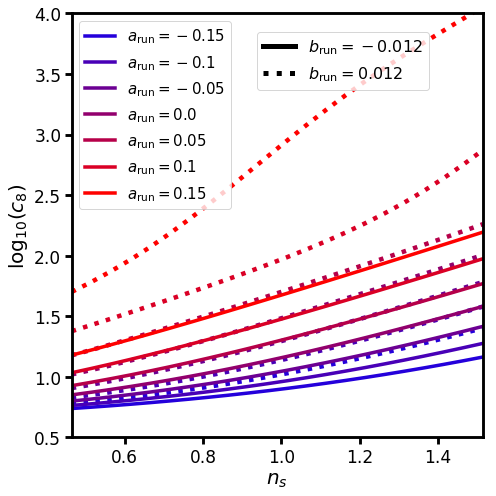

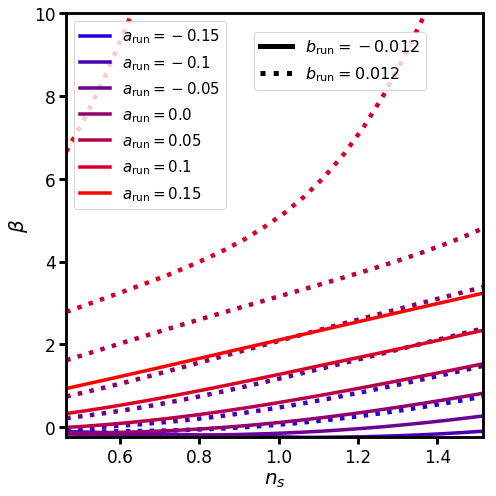

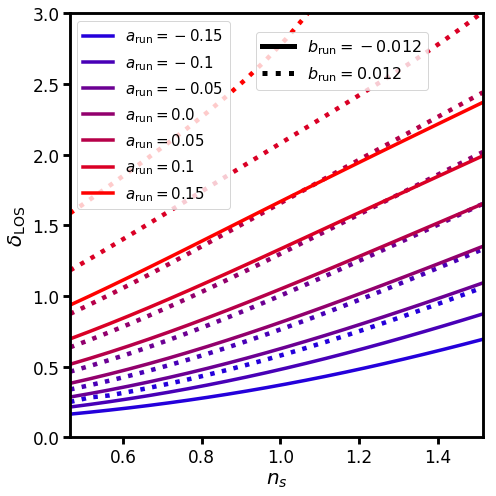

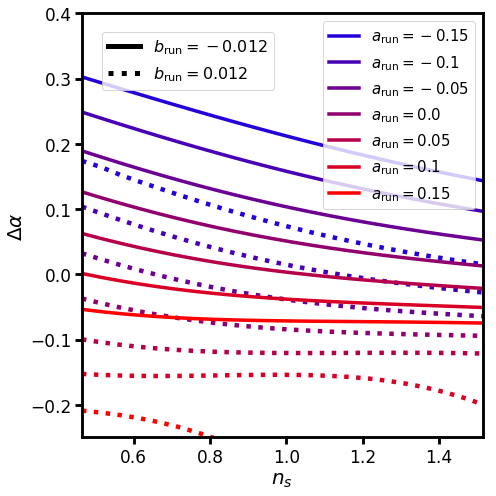

In [43]:
step = 0.05
arun_values = np.arange(-0.15, 0.15 + step, step)
ar2_1=-0.012
ar2_2=0.000
ar2_3=0.012
pivot_scale = 1.0

mfunc_model = 'rodriguezPuebla2016'
fig = plt.figure(1)
fig.set_size_inches(7, 7)
ax = plt.subplot(111)
make_c8_mapping_figure(ax, mfunc_model, pivot_scale, arun_values, ar2_1, ar2_2, ar2_3, save=True)

fig = plt.figure(2)
fig.set_size_inches(7, 7)
ax = plt.subplot(111)
make_beta_mapping_figure(ax, mfunc_model, pivot_scale, arun_values, ar2_1, ar2_2, ar2_3, save=True)

fig = plt.figure(3)
fig.set_size_inches(7, 7)
ax = plt.subplot(111)
make_dlos_mapping_figure(ax, mfunc_model, pivot_scale, arun_values, ar2_1, ar2_2, ar2_3, save=True)

fig = plt.figure(4)
fig.set_size_inches(7, 7)
ax = plt.subplot(111)
make_dalpha_mapping_figure(ax, mfunc_model, pivot_scale, arun_values, ar2_1, ar2_2, ar2_3, save=True)

### Show how the $q_p$ parmameters map onto the lensing likelihood

In [44]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import os

cmap_curves = cm.get_cmap('bwr')
s = 150

ticksize_mapping = 20
cmap_joint_mapping = 'magma'

def mapping_for_joint_pdf_figure(func, arun_values, ns_1, ns_2, ns_3, ar2_1, ar2_2, ar2_3):
    
    c0_1, beta_1, dplawidx_1, losnorm_1 = [], [], [], []
    c0_2, beta_2, dplawidx_2, losnorm_2 = [], [], [], []
    c0_3, beta_3, dplawidx_3, losnorm_3 = [], [], [], []
    
    ns = 0.9645
    for ari in arun_values:
        (_losnorm, _beta, _c0, _dplawidx) = func(ns_1, ari, ar2_1)
        c0_1.append(_c0)
        beta_1.append(_beta)
        dplawidx_1.append(_dplawidx)
        losnorm_1.append(_losnorm)
        
        (_losnorm, _beta, _c0, _dplawidx) = func(ns_2, ari, ar2_2)
        c0_2.append(_c0)
        beta_2.append(_beta)
        dplawidx_2.append(_dplawidx)
        losnorm_2.append(_losnorm)
        
        (_losnorm, _beta, _c0, _dplawidx) = func(ns_3, ari, ar2_3)
        c0_3.append(_c0)
        beta_3.append(_beta)
        dplawidx_3.append(_dplawidx)
        losnorm_3.append(_losnorm)
        
    return c0_1, beta_1, dplawidx_1, losnorm_1, c0_2, beta_2, dplawidx_2, losnorm_2, c0_3, beta_3, dplawidx_3, losnorm_3

def make_joint_distribution_dlosc8_mapping_figure(mfunc_model, pivot_scale, arun_values, ns_1, ns_2, ns_3, ar2_1, ar2_2, ar2_3, save=False):
    
    fig = plt.figure(1)
    fig.set_size_inches(8,8)
    triangle_plot = TrianglePlot([lensing_likelihood_w])
    triangle_plot.set_cmap(cmap_joint_mapping, marginal_col='k')
    triangle_plot.truth_color = 'k'
    truths= {'sigma_sub': 1.05, 'LOS_normalization': 1., 'beta': 0.85, 'log10c0': np.log10(18.5), 'delta_power_law_index': 0.}
    axes, ims = triangle_plot.make_joint('LOS_normalization', 'log10c0', filled_contours=False, contour_alpha=0.6, 
                                    levels=[0.4, 0.6, 1.], show_contours=False)
    
    pivot_string = string_ranges_for_pivot(pivot_scale)[0]
    fname = os.getenv("HOME") + '/Code/lenslikelihood/notebooks_Pk/interpolated_mappings/mapping_' + mfunc_model + '_pivot'+pivot_string
    f = open(fname, 'rb')
    func = pickle.load(f)
    
    out = mapping_for_joint_pdf_figure(func, arun_values, ns_1, ns_2, ns_3, ar2_1, ar2_2, ar2_3)
    (c0_1, beta_1, dplawidx_1, losnorm_1, c0_2, beta_2, dplawidx_2, losnorm_2, c0_3, beta_3, dplawidx_3, losnorm_3) = out
    
    custom_lines = []
    custom_lines.append(Line2D([0], [0], color=cmap_curves(0.), lw=7))
    custom_lines.append(Line2D([0], [0], color=cmap_curves(0.5), lw=7))
    custom_lines.append(Line2D([0], [0], color=cmap_curves(1.), lw=7))
    line_labels = [r'$a_{\rm{run}} < 0$', r'$a_{\rm{run}} = 0$', r'$a_{\rm{run}} > 0$']
        
    kwargs_plot_1 = {'s': s, 'marker': 'D'}
    kwargs_plot_2 = {'s': s, 'marker': 'o'}
    kwargs_plot_3 = {'s': s, 'marker': 'P'}
    cmap_norm = len(c0_1)
    
    for i in range(0, len(c0_1)):
        axes.scatter(losnorm_1[i], c0_1[i], color= cmap_curves(i/cmap_norm), **kwargs_plot_1)
        axes.scatter(losnorm_2[i], c0_2[i], color= cmap_curves(i/cmap_norm), **kwargs_plot_2)
        axes.scatter(losnorm_3[i], c0_3[i], color= cmap_curves(i/cmap_norm), **kwargs_plot_3)
        
    brun_label_1 = r'$b_{\rm{run}} = -$'+str(abs(ar2_1)) +'\n'+ r'$n_s = $'+str(abs(np.round(ns_1, 2)))
    brun_label_2 = r'$b_{\rm{run}} = $'+str(abs(ar2_2)) +'\n'+ r'$n_s = $'+str(abs(np.round(ns_2, 2)))
    brun_label_3 = r'$b_{\rm{run}} = $'+str(abs(ar2_3)) +'\n'+ r'$n_s = $'+str(abs(np.round(ns_3, 2)))
    axes.scatter(0.1, 0.1, color='k', label=brun_label_1, marker='D', s=s)
    axes.scatter(0.1, 0.1, color='k', label=brun_label_2, marker='o', s=s)
    axes.scatter(0.1, 0.1, color='k', label=brun_label_3, marker='P', s=s)

    leg = axes.legend(fontsize=16, loc=(0.02, 0.68), frameon=True, framealpha=0.5, handletextpad=0.)
    axes.legend(custom_lines, line_labels, fontsize=16, frameon=True, framealpha=0.5, loc=(0.4, 0.8))
    axes.add_artist(leg)
    
    axes.set_xlabel(delta_LOS, fontsize=20)
    axes.set_ylabel(c0, fontsize=20)
    axes.set_xticks(dlos_ticks)
    axes.set_xticklabels(dlos_ticks, fontsize=16)
    axes.set_yticks(c0_ticks)
    axes.set_yticklabels(c0_ticks, fontsize=16)
    axes.tick_params(axis='x', labelsize=ticksize_mapping)
    axes.tick_params(axis='y', labelsize=ticksize_mapping)
    plt.tight_layout()
    
    if save:
        pivot_string = string_ranges_for_pivot(pivot_scale)[0]
        save_name = './figures_for_paper/joint_pdf_dlosc8_mapping_pivot'+pivot_string+'.pdf'
        plt.savefig(save_name)
        
def make_joint_distribution_dlosdalpha_mapping_figure(mfunc_model, pivot_scale, arun_values, ns_1, ns_2, ns_3, ar2_1, ar2_2, ar2_3, save=False):
    
    fig = plt.figure(1)
    fig.set_size_inches(8,8)
    triangle_plot = TrianglePlot([lensing_likelihood_w])
    triangle_plot.set_cmap(cmap_joint_mapping, marginal_col='k')
    triangle_plot.truth_color = 'k'
    truths= {'sigma_sub': 1.05, 'LOS_normalization': 1., 'beta': 0.85, 'log10c0': np.log10(18.5), 'delta_power_law_index': 0.}
    axes, ims = triangle_plot.make_joint('LOS_normalization', 'delta_power_law_index', filled_contours=False, contour_alpha=0.6, 
                                    levels=[0.4, 0.6, 1.], show_contours=False)
    
    pivot_string = string_ranges_for_pivot(pivot_scale)[0]
    fname = os.getenv("HOME") + '/Code/lenslikelihood/notebooks_Pk/interpolated_mappings/mapping_' + mfunc_model + '_pivot'+pivot_string
    f = open(fname, 'rb')
    func = pickle.load(f)
    
    out = mapping_for_joint_pdf_figure(func, arun_values, ns_1, ns_2, ns_3, ar2_1, ar2_2, ar2_3)
    (c0_1, beta_1, dplawidx_1, losnorm_1, c0_2, beta_2, dplawidx_2, losnorm_2, c0_3, beta_3, dplawidx_3, losnorm_3) = out
    
    custom_lines = []
    custom_lines.append(Line2D([0], [0], color=cmap_curves(0.), lw=7))
    custom_lines.append(Line2D([0], [0], color=cmap_curves(0.5), lw=7))
    custom_lines.append(Line2D([0], [0], color=cmap_curves(1.), lw=7))
    line_labels = [r'$a_{\rm{run}} < 0$', r'$a_{\rm{run}} = 0$', r'$a_{\rm{run}} > 0$']
    
    kwargs_plot_1 = {'s': s, 'marker': 'D'}
    kwargs_plot_2 = {'s': s, 'marker': 'o'}
    kwargs_plot_3 = {'s': s, 'marker': 'P'}
    cmap_norm = len(c0_1)
    
    for i in range(0, len(c0_1)):
        axes.scatter(losnorm_1[i], dplawidx_1[i], color= cmap_curves(i/cmap_norm), **kwargs_plot_1)
        axes.scatter(losnorm_2[i], dplawidx_2[i], color= cmap_curves(i/cmap_norm), **kwargs_plot_2)
        axes.scatter(losnorm_3[i], dplawidx_3[i], color= cmap_curves(i/cmap_norm), **kwargs_plot_3)
        
    brun_label_1 = r'$b_{\rm{run}} = -$'+str(abs(ar2_1)) +'\n'+ r'$n_s = $'+str(abs(np.round(ns_1, 2)))
    brun_label_2 = r'$b_{\rm{run}} = $'+str(abs(ar2_2)) +'\n'+ r'$n_s = $'+str(abs(np.round(ns_2, 2)))
    brun_label_3 = r'$b_{\rm{run}} = $'+str(abs(ar2_3)) +'\n'+ r'$n_s = $'+str(abs(np.round(ns_3, 2)))
    axes.scatter(2.3, -0.5, color='k', label=brun_label_1, marker='D', s=s)
    axes.scatter(2.3, -0.5, color='k', label=brun_label_2, marker='o', s=s)
    axes.scatter(2.3, -0.5, color='k', label=brun_label_3, marker='P', s=s)

    leg = axes.legend(fontsize=16, loc=(0.02, 0.68), frameon=True, framealpha=0.5, handletextpad=0.)
    axes.legend(custom_lines, line_labels, fontsize=16, frameon=True, framealpha=0.5, loc=(0.4, 0.8))
    axes.add_artist(leg)
    
    axes.set_xlabel(delta_LOS, fontsize=20)
    axes.set_ylabel(delta_power_law_index, fontsize=20)
    axes.set_xticks(dlos_ticks)
    axes.set_xticklabels(dlos_ticks, fontsize=16)
    axes.set_yticks(dpli_ticks)
    axes.set_yticklabels(dpli_ticks, fontsize=16)
    axes.tick_params(axis='x', labelsize=ticksize_mapping)
    axes.tick_params(axis='y', labelsize=ticksize_mapping)
    plt.tight_layout()
    
    if save:
        pivot_string = string_ranges_for_pivot(pivot_scale)[0]
        save_name = './figures_for_paper/joint_pdf_dlosdalpha_mapping_pivot'+pivot_string+'.pdf'
        plt.savefig(save_name)
        
def make_joint_distribution_c8beta_mapping_figure(mfunc_model, pivot_scale, arun_values, ns_1, ns_2, ns_3, ar2_1, ar2_2, ar2_3, save=False):
    
    fig = plt.figure(1)
    fig.set_size_inches(8,8)
    triangle_plot = TrianglePlot([lensing_likelihood_w])
    triangle_plot.set_cmap(cmap_joint_mapping, marginal_col='k')
    triangle_plot.truth_color = 'k'
    truths= {'sigma_sub': 1.05, 'LOS_normalization': 1., 'beta': 0.85, 'log10c0': np.log10(18.5), 'delta_power_law_index': 0.}
    axes, ims = triangle_plot.make_joint('log10c0', 'beta', filled_contours=False, contour_alpha=0.6, 
                                    levels=[0.4, 0.6, 1.], show_contours=False)
    
    pivot_string = string_ranges_for_pivot(pivot_scale)[0]
    fname = os.getenv("HOME") + '/Code/lenslikelihood/notebooks_Pk/interpolated_mappings/mapping_' + mfunc_model + '_pivot'+pivot_string
    f = open(fname, 'rb')
    func = pickle.load(f)
    
    out = mapping_for_joint_pdf_figure(func, arun_values, ns_1, ns_2, ns_3, ar2_1, ar2_2, ar2_3)
    (c0_1, beta_1, dplawidx_1, losnorm_1, c0_2, beta_2, dplawidx_2, losnorm_2, c0_3, beta_3, dplawidx_3, losnorm_3) = out
    
    custom_lines = []
    custom_lines.append(Line2D([0], [0], color=cmap_curves(0.), lw=7))
    custom_lines.append(Line2D([0], [0], color=cmap_curves(0.5), lw=7))
    custom_lines.append(Line2D([0], [0], color=cmap_curves(1.), lw=7))
    line_labels = [r'$a_{\rm{run}} < 0$', r'$a_{\rm{run}} = 0$', r'$a_{\rm{run}} > 0$']
    
    kwargs_plot_1 = {'s': s, 'marker': 'D'}
    kwargs_plot_2 = {'s': s, 'marker': 'o'}
    kwargs_plot_3 = {'s': s, 'marker': 'P'}
    cmap_norm = len(c0_1)
    
    for i in range(0, len(c0_1)):
        axes.scatter(c0_1[i], beta_1[i], color= cmap_curves(i/cmap_norm), **kwargs_plot_1)
        axes.scatter(c0_2[i], beta_2[i], color= cmap_curves(i/cmap_norm), **kwargs_plot_2)
        axes.scatter(c0_3[i], beta_3[i], color= cmap_curves(i/cmap_norm), **kwargs_plot_3)
        
    brun_label_1 = r'$b_{\rm{run}} = -$'+str(abs(ar2_1)) +'\n'+ r'$n_s = $'+str(abs(np.round(ns_1, 2)))
    brun_label_2 = r'$b_{\rm{run}} = $'+str(abs(ar2_2)) +'\n'+ r'$n_s = $'+str(abs(np.round(ns_2, 2)))
    brun_label_3 = r'$b_{\rm{run}} = $'+str(abs(ar2_3)) +'\n'+ r'$n_s = $'+str(abs(np.round(ns_3, 2)))
    axes.scatter(2.3, -0.5, color='k', label=brun_label_1, marker='D', s=s)
    axes.scatter(2.3, -0.5, color='k', label=brun_label_2, marker='o', s=s)
    axes.scatter(2.3, -0.5, color='k', label=brun_label_3, marker='P', s=s)

    leg = axes.legend(fontsize=16, loc=(0.02, 0.69), frameon=True, framealpha=0.5, handletextpad=0.)
    axes.legend(custom_lines, line_labels, fontsize=16, frameon=True, framealpha=0.5, loc=(0.4, 0.8))
    axes.add_artist(leg)
    
    axes.set_xlabel(c0, fontsize=20)
    axes.set_ylabel(beta, fontsize=20)
    axes.set_xticks(c0_ticks)
    axes.set_xticklabels(c0_ticks, fontsize=16)
    axes.set_yticks(beta_ticks)
    axes.set_yticklabels(beta_ticks, fontsize=16)
    axes.tick_params(axis='x', labelsize=ticksize_mapping)
    axes.tick_params(axis='y', labelsize=ticksize_mapping)
    plt.tight_layout()
    
    if save:
        pivot_string = string_ranges_for_pivot(pivot_scale)[0]
        save_name = './figures_for_paper/joint_pdf_c8beta_mapping_pivot'+pivot_string+'.pdf'
        plt.savefig(save_name)
        
def make_joint_distribution_c8dalpha_mapping_figure(mfunc_model, pivot_scale, arun_values, ns_1, ns_2, ns_3, ar2_1, ar2_2, ar2_3, save=False):
    
    fig = plt.figure(1)
    fig.set_size_inches(8,8)
    triangle_plot = TrianglePlot([lensing_likelihood_w])
    triangle_plot.set_cmap(cmap_joint_mapping, marginal_col='k')
    triangle_plot.truth_color = 'k'
    truths= {'sigma_sub': 1.05, 'LOS_normalization': 1., 'beta': 0.85, 'log10c0': np.log10(18.5), 'delta_power_law_index': 0.}
    axes, ims = triangle_plot.make_joint('log10c0', 'delta_power_law_index', filled_contours=False, contour_alpha=0.6, 
                                    levels=[0.4, 0.6, 1.], show_contours=False)
    
    pivot_string = string_ranges_for_pivot(pivot_scale)[0]
    fname = os.getenv("HOME") + '/Code/lenslikelihood/notebooks_Pk/interpolated_mappings/mapping_' + mfunc_model + '_pivot'+pivot_string
    f = open(fname, 'rb')
    func = pickle.load(f)
    
    out = mapping_for_joint_pdf_figure(func, arun_values, ns_1, ns_2, ns_3, ar2_1, ar2_2, ar2_3)
    (c0_1, beta_1, dplawidx_1, losnorm_1, c0_2, beta_2, dplawidx_2, losnorm_2, c0_3, beta_3, dplawidx_3, losnorm_3) = out
    
    custom_lines = []
    custom_lines.append(Line2D([0], [0], color=cmap_curves(0.), lw=7))
    custom_lines.append(Line2D([0], [0], color=cmap_curves(0.5), lw=7))
    custom_lines.append(Line2D([0], [0], color=cmap_curves(1.), lw=7))
    line_labels = [r'$a_{\rm{run}} < 0$', r'$a_{\rm{run}} = 0$', r'$a_{\rm{run}} > 0$']
    
    kwargs_plot_1 = {'s': s, 'marker': 'D'}
    kwargs_plot_2 = {'s': s, 'marker': 'o'}
    kwargs_plot_3 = {'s': s, 'marker': 'P'}
    cmap_norm = len(c0_1)
    
    for i in range(0, len(c0_1)):
        axes.scatter(c0_1[i], dplawidx_1[i], color= cmap_curves(i/cmap_norm), **kwargs_plot_1)
        axes.scatter(c0_2[i], dplawidx_2[i], color= cmap_curves(i/cmap_norm), **kwargs_plot_2)
        axes.scatter(c0_3[i], dplawidx_3[i], color= cmap_curves(i/cmap_norm), **kwargs_plot_3)
        
    brun_label_1 = r'$b_{\rm{run}} = -$'+str(abs(ar2_1)) +'\n'+ r'$n_s = $'+str(abs(np.round(ns_1, 2)))
    brun_label_2 = r'$b_{\rm{run}} = $'+str(abs(ar2_2)) +'\n'+ r'$n_s = $'+str(abs(np.round(ns_2, 2)))
    brun_label_3 = r'$b_{\rm{run}} = $'+str(abs(ar2_3)) +'\n'+ r'$n_s = $'+str(abs(np.round(ns_3, 2)))
    axes.scatter(0.1, -0.5, color='k', label=brun_label_1, marker='D', s=s)
    axes.scatter(0.1, -0.5, color='k', label=brun_label_2, marker='o', s=s)
    axes.scatter(0.1, -0.5, color='k', label=brun_label_3, marker='P', s=s)

    leg = axes.legend(fontsize=16, loc=(0.02, 0.675), frameon=True, framealpha=0.5, handletextpad=0.)
    axes.legend(custom_lines, line_labels, fontsize=16, frameon=True, framealpha=0.5, loc=(0.4, 0.8))
    axes.add_artist(leg)
    
    axes.set_xlabel(c0, fontsize=20)
    axes.set_ylabel(delta_power_law_index, fontsize=20)
    axes.set_xticks(c0_ticks)
    axes.set_xticklabels(c0_ticks, fontsize=16)
    axes.set_yticks(dpli_ticks)
    axes.set_yticklabels(dpli_ticks, fontsize=16)
    axes.tick_params(axis='x', labelsize=ticksize_mapping)
    axes.tick_params(axis='y', labelsize=ticksize_mapping)
    plt.tight_layout()
    
    if save:
        pivot_string = string_ranges_for_pivot(pivot_scale)[0]
        save_name = './figures_for_paper/joint_pdf_c8dalpha_mapping_pivot'+pivot_string+'.pdf'
        plt.savefig(save_name)
        
        
mfunc_model = 'shethTormen'
pivot_scale = 1.0
ar_step = 0.02
arun_values = np.arange(-0.14, 0.14 + ar_step, ar_step)
ar2_1 = -0.012
ar2_2 = 0.00
ar2_3 = 0.012
ns_step = 0.5
ns_1 = 0.9645 - ns_step
ns_2 = 0.9645 
ns_3 = 0.9645 + ns_step

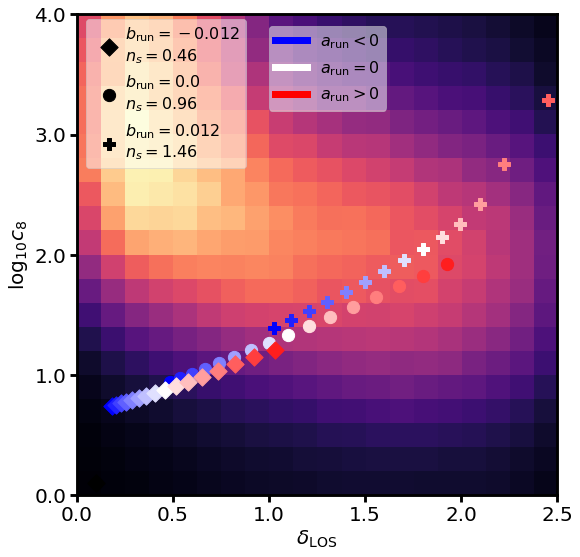

In [45]:
make_joint_distribution_dlosc8_mapping_figure(mfunc_model, pivot_scale, arun_values, ns_1, ns_2, ns_3, ar2_1, ar2_2, ar2_3, save=True)

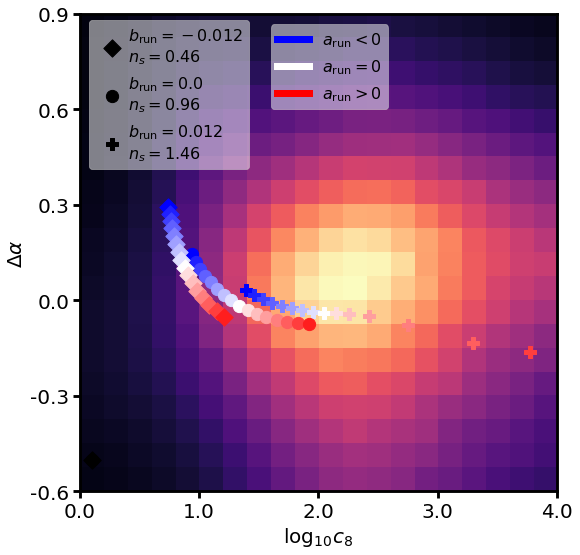

In [46]:
make_joint_distribution_c8dalpha_mapping_figure(mfunc_model, pivot_scale, arun_values, ns_1, ns_2, ns_3, ar2_1, ar2_2, ar2_3, save=True)


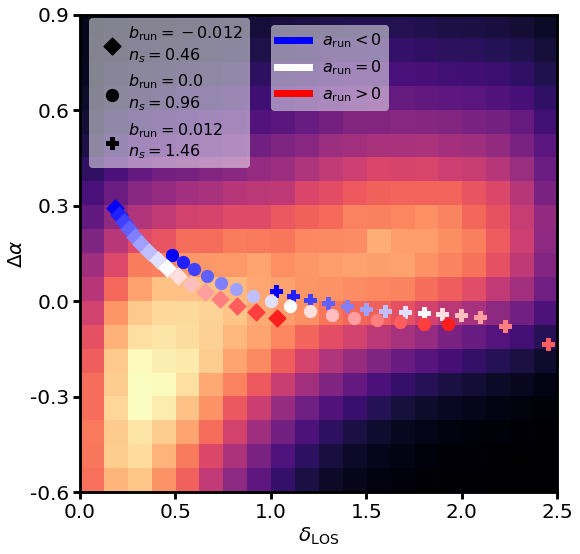

In [47]:
make_joint_distribution_dlosdalpha_mapping_figure(mfunc_model, pivot_scale, arun_values, ns_1, ns_2, ns_3, ar2_1, ar2_2, ar2_3, save=True)

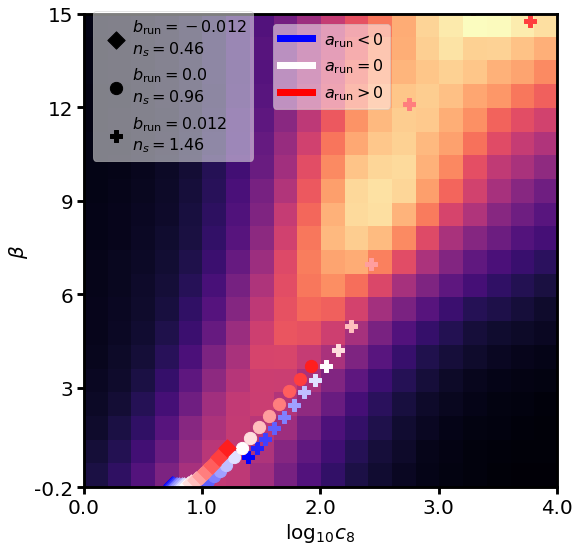

In [48]:
make_joint_distribution_c8beta_mapping_figure(mfunc_model, pivot_scale, arun_values, ns_1, ns_2, ns_3, ar2_1, ar2_2, ar2_3, save=True)

### Plotting routines for P(k) inference figure

In [20]:
from trikde.triangleplot import compute_confidence_intervals
from scipy.interpolate import interp1d
from lenslikelihood.pk_measurements import * 

ticksize_main_fig = 18

def confidence_band_at_k(keval_list, param_ranges_pk, pivot, likelihood, ndraw=5000):
    
    if isinstance(keval_list, int) or isinstance(keval_list, float):
        keval_list = [keval_list]
        
    medians = []
    upper_68 = []
    lower_68 = []
    for keval in keval_list:
        
        samples = np.empty((ndraw, 3))
        sample_weights = []
        
        samples[:,0] = np.random.uniform(param_ranges_pk[0][0], param_ranges_pk[0][1], ndraw)
        samples[:,1] = np.random.uniform(param_ranges_pk[1][0], param_ranges_pk[1][1], ndraw)
        samples[:,2] = np.random.uniform(param_ranges_pk[2][0], param_ranges_pk[2][1], ndraw)
        sample_weights = [likelihood(samples[i,:]) for i in range(0, ndraw)]
        _, l, domain, _, _ = Pk_from_likelihood(samples, sample_weights, pivot, keval, n_max=ndraw,
                           nbins=20, x_range=None, prior_sample_factor=15000, edge_cut_factor=20,
                           ns_fixed_above_pivot=0.9645)
        
        samples = []
        pk_likelihood = l/max(l)
        likelihood_interp = interp1d(domain, pk_likelihood)
        while len(samples) < 2000:
            u = np.random.rand()
            x = np.random.uniform(domain[0], domain[-1])
            p = likelihood_interp(x)
            if p >= u:
                samples.append(x)
        
        mu, [mu_minus_lower, upper_minus_mu] = compute_confidence_intervals(np.array(samples), 1)
        _lower_68 = mu - mu_minus_lower
        _upper_68 = upper_minus_mu + mu
        
        medians.append(mu)
        lower_68.append(_lower_68)
        upper_68.append(_upper_68)
    
    return np.array(medians), np.array(upper_68), np.array(lower_68)

def plot_existing_measurements(ax, alpha=1.0, markersize=40):
    
    ii = 0
    for _, (k, pk, xerr, yerr) in enumerate(zip(kvalues, power_spectra, xerrors, yerrors)):

        label = labels[names[ii]]
        try:
            ax.errorbar(k, pk, xerr=xerr, yerr=yerr, fmt='none', color=colors[names[ii]],
                   label=label, zorder=zorders[names[ii]], alpha=alpha)
        except:
            ax.errorbar(k, pk, xerr=xerr.T, yerr=yerr, fmt='none', color=colors[names[ii]],
                   label=label, zorder=zorders[names[ii]], alpha=alpha)
        ax.scatter(k, pk, color=colors[names[ii]], s=markersize, zorder=zorders[names[ii]], alpha=alpha)
        ii += 1

    for _, (k, pk, yerr) in enumerate(zip(kvalues_no_x_error, power_spectra_noxerror, yerrors_no_x_error)):

        label = labels[names[ii]]

        try:
            ax.errorbar(k, pk, yerr=yerr, fmt='none', color=colors[names[ii]],zorder=zorders[names[ii]], alpha=alpha)
        except:
            ax.errorbar(k, pk, yerr=yerr.T, fmt='none', color=colors[names[ii]],zorder=zorders[names[ii]], alpha=alpha)

        ax.scatter(k, pk, color=colors[names[ii]], label=label, s=markersize, zorder=zorders[names[ii]],
                  alpha=alpha)
        ii += 1
    ax.set_xscale('log')
    ax.set_yscale('log')
    
def plot_theory_pk(ax, kvalues, color='k', linestyle='-', alpha=0.7):
    
    Lcdm_label = r'$\Lambda \rm{CDM}$' + '\n'+r'$P\left(k\right) = P\left(k_0\right) \left(\frac{k}{k_0}\right)^{-0.9645}$'
    pk_theory = 10**pk_galacticus_interp(np.log10(kvalues))
    ax.plot(kvalues, pk_theory, color=color, label=Lcdm_label, linestyle=linestyle, alpha=alpha)
    ax.set_xscale('log')
    ax.set_yscale('log')

def plot_confidence_band(ax, kvalues, medians, upper_bound, lower_bound,  
                         color='k', alpha=0.5, label=''):
    
    cmap = cm.get_cmap('bone')
    ax.plot(kvalues, 10**np.array(lower_bound), color='k', lw=4.5)
    ax.plot(kvalues, 10**np.array(upper_bound), color='k', lw=4.5)
    ax.fill_between(kvalues, 10**np.array(lower_bound), 10**np.array(upper_bound), color='0.2', alpha=alpha, label=label)
    ax.set_xscale('log')
    ax.set_yscale('log')

def plot_pk_minmax(ax, k_values_minmax, pivot_scale, pk_ranges_for_plot, color='0.5', linestyle=':', label='prior min/max'):
    
    pk_max = sample_pk(pk_ranges_for_plot[0][0], pk_ranges_for_plot[1][0], pk_ranges_for_plot[2][0], k_values_minmax, pivot_scale, 0.9645)
    pk_min = sample_pk(pk_ranges_for_plot[0][1], pk_ranges_for_plot[1][1], pk_ranges_for_plot[2][1], k_values_minmax, pivot_scale, 0.9645)
    ax.plot(k_values_minmax, pk_min, color=color, linestyle=linestyle, label=label, lw=3)
    ax.plot(k_values_minmax, pk_max, color=color, linestyle=linestyle, lw=3)
    ax.set_xscale('log')
    ax.set_yscale('log')
    
def set_ticks_and_labels_v1(ax):
    
    ax_upper = ax.twiny()
    rhocrit = 31684042798.22298 # assuming H0 = 69.7
    
    x_values = np.array([1e-4, 1e-3, 1e-2, 1e-1, 1., 1e1, 70])
    m = (4/3) * rhocrit * (2 * np.pi/x_values) ** 3
    upper_xticks = np.round(np.log10(m), 2)
    upper_xticklocs = np.linspace(0, 1., len(x_values))
    
    ax_upper.set_xticks(upper_xticklocs)
    
    upper_xtick_labels = ['']
    ax_upper.set_xticklabels([r'$10^{25}$', 
                             r'$10^{22}$',
                             r'$10^{19}$',
                             r'$10^{16}$',
                             r'$10^{13}$',
                             r'$10^{10}$',
                             r'$10^{7.5}$'], fontsize=18)
    ax_upper.set_xlabel('corresponding halo mass '+r'$\left[M_{\odot}\right]$', fontsize=labelsize, labelpad=14)
    
    xticks = np.array([1e-4, 1e-3, 1e-2,1e-1, 1., 10, 70])
    ax.set_xticks([1e-4, 1e-3, 1e-2, 1e-1, 1., 10, 70])
    ax.set_xticklabels([r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$', r'$0.1$', r'$1$', r'$10$', r'$70$'],
                  fontsize=18)

    ax.set_xlabel(r'$k \ \left[\rm{Mpc^{-1}}\right]$', fontsize=24)
    ax.set_ylabel(r'$P_{\rm{lin}}(k) \ \left[\rm{Mpc}^3\right]$', fontsize=24)

    ax.set_yticks([1e-4, 1e-2, 1e0, 1e2,1e4])
    ax.set_yticklabels([r'$10^{-4}$', r'$10^{-2}$', r'$10^{0}$', r'$10^{2}$', r'$10^{4}$'],
                      fontsize=18)
    ax.set_xlim(10**-4, 70)
    ax.set_ylim(1e-5, 5e+5)
    
def set_ticks_and_labels_v2(ax):
    
    ax_upper = ax.twiny()
    rhocrit = 31684042798.22298 # assuming H0 = 69.7
    
    x_values = np.array([1e-2, 1e-1, 1., 1e1, 70])
    m = (4/3) * rhocrit * (2 * np.pi/x_values) ** 3
    upper_xticks = np.round(np.log10(m), 2)
    upper_xticklocs = np.linspace(0, 1., len(x_values))
    
    ax_upper.set_xticks(upper_xticklocs)
    
    upper_xtick_labels = ['']
    ax_upper.set_xticklabels([r'$10^{19}$',
                             r'$10^{16}$',
                             r'$10^{13}$',
                             r'$10^{10}$',
                             r'$10^{7.5}$'], fontsize=18)
    ax_upper.set_xlabel('corresponding halo mass '+r'$\left[M_{\odot}\right]$', fontsize=labelsize, labelpad=14)
    
    ax.set_xlabel(r'$k \ \left[\rm{Mpc^{-1}}\right]$', fontsize=24)
    ax.set_ylabel(r'$P_{\rm{lin}}(k) \ \left[\rm{Mpc}^3\right]$', fontsize=24)

    ax.set_yticks([1e-4, 1e-2, 1e0, 1e2,1e4])
    ax.set_yticklabels([r'$10^{-4}$', r'$10^{-2}$', r'$10^{0}$', r'$10^{2}$', r'$10^{4}$'],
                      fontsize=18)
    ax.set_xlim(10**-2, 70)
    ax.set_ylim(1e-5, 5e+5)
    xticks = np.array([1e-2,1e-1, 1., 10, 69.999])
    ax.set_xticks(xticks)
    ax.set_xticklabels([r'$10^{-2}$', r'$0.1$', r'$1$', r'$10$', r'$70$'],
                  fontsize=18)
    ax.tick_params(axis='x', labelsize=ticksize_main_fig)
    ax.tick_params(axis='y', labelsize=ticksize_main_fig)

    
def add_curves(ax, pivot, kvalues, likelihood=None, samples=None, color='0.5', alpha=0.05, lw=0.08, ndraw=2000):
    
    if samples is None:
        samples = likelihood.sample(ndraw)
    else:
        ndraw = samples.shape[0]
    
    cmap = cm.get_cmap('bone')
    curves = [sample_pk(samples[i,0], samples[i,1], samples[i,2], kvalues, pivot, 0.9645) for i in range(0, ndraw)]
    ax.plot(np.array([kvalues] * ndraw).T, np.array(curves).T, color=color, alpha=alpha, lw=lw, zorder=0)
    ax.set_xscale('log')
    ax.set_yscale('log')
    
def make_reconstruction_figure(ax, pivot, pk_ranges_for_plot, data_k_values, curve_samples, medians, lower_68, upper_68, save=False, save_name=''):
    
    theory_k_values = np.logspace(-4, np.log10(70), 200)
    plot_theory_pk(ax, theory_k_values, linestyle='-', color='k', alpha=0.8)
    theory_k_values = np.logspace(np.log10(5), np.log10(70), 200)
    label = '68% CI strong lensing (this work)'
    plot_confidence_band(ax, data_k_values, medians, lower_68, upper_68, label=label)
    kminmax = np.logspace(np.log10(data_k_values[0]), np.log10(70), 100)
    plot_pk_minmax(ax, kminmax, pivot, pk_ranges_for_plot, linestyle=':', color='k', label='prior min/max')
    plot_existing_measurements(ax)
    k_plot_pivot = np.logspace(np.log10(pivot), np.log10(70), 200)
    add_curves(ax, pivot, k_plot_pivot, samples=curve_samples)
    ax.legend(fontsize=20, loc=3, frameon=False)
    set_ticks_and_labels_v2(ax)
    

### The following cells compute the inference of P(k) and plot it for different mass function models and pivot scales

In [21]:
ncurves = 20000
mfunc_model = 'shethTormen'
likelihood = qp_likelihoods_dict_pivot1[mfunc_model]
pk_ranges_pivot1 = qp_likelihoods_dict_pivot1[mfunc_model+'_ranges']
pivot_scale = 1.0
samples_ST_pivot1 = qp_likelihoods_dict_pivot1[mfunc_model].sample(ncurves)
keval_pivot1 = np.logspace(np.log10(pivot_scale)+0.01, np.log10(70), 10)
median_ST_pivot1, lower_68_ST_pivot1, upper_68_ST_pivot1 = confidence_band_at_k(keval_pivot1, pk_ranges_pivot1, pivot_scale, likelihood)
print('done')

mfunc_model = 'bhattacharya2011'
likelihood = qp_likelihoods_dict_pivot1[mfunc_model]
pk_ranges = qp_likelihoods_dict_pivot1[mfunc_model+'_ranges']
samples_B_pivot1 = qp_likelihoods_dict_pivot1[mfunc_model].sample(ncurves)
median_B_pivot1, lower_68_B_pivot1, upper_68_B_pivot1 = confidence_band_at_k(keval_pivot1, pk_ranges_pivot1, pivot_scale, likelihood)
print('done')

mfunc_model = 'rodriguezPuebla2016'
likelihood = qp_likelihoods_dict_pivot1[mfunc_model]
pk_ranges = qp_likelihoods_dict_pivot1[mfunc_model+'_ranges']
samples_R_pivot1 = qp_likelihoods_dict_pivot1[mfunc_model].sample(ncurves)
median_R_pivot1, lower_68_R_pivot1, upper_68_R_pivot1 = confidence_band_at_k(keval_pivot1, pk_ranges_pivot1, pivot_scale, likelihood)
print('done')

sampling.... 10.0%
sampling.... 20.0%
sampling.... 30.0%
sampling.... 40.0%
sampling.... 50.0%
sampling.... 60.0%
sampling.... 70.0%
sampling.... 80.0%
sampling.... 90.0%
done
sampling.... 10.0%
sampling.... 20.0%
sampling.... 30.0%
sampling.... 40.0%
sampling.... 50.0%
sampling.... 60.0%
sampling.... 70.0%
sampling.... 80.0%
sampling.... 90.0%
done
sampling.... 10.0%
sampling.... 20.0%
sampling.... 30.0%
sampling.... 40.0%
sampling.... 50.0%
sampling.... 60.0%
sampling.... 70.0%
sampling.... 80.0%
sampling.... 90.0%
done


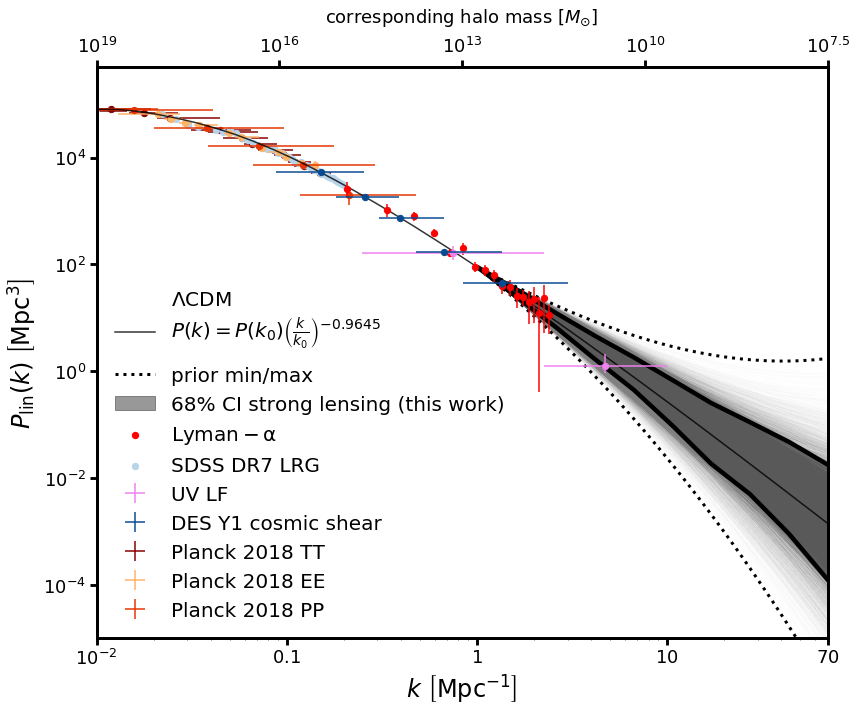

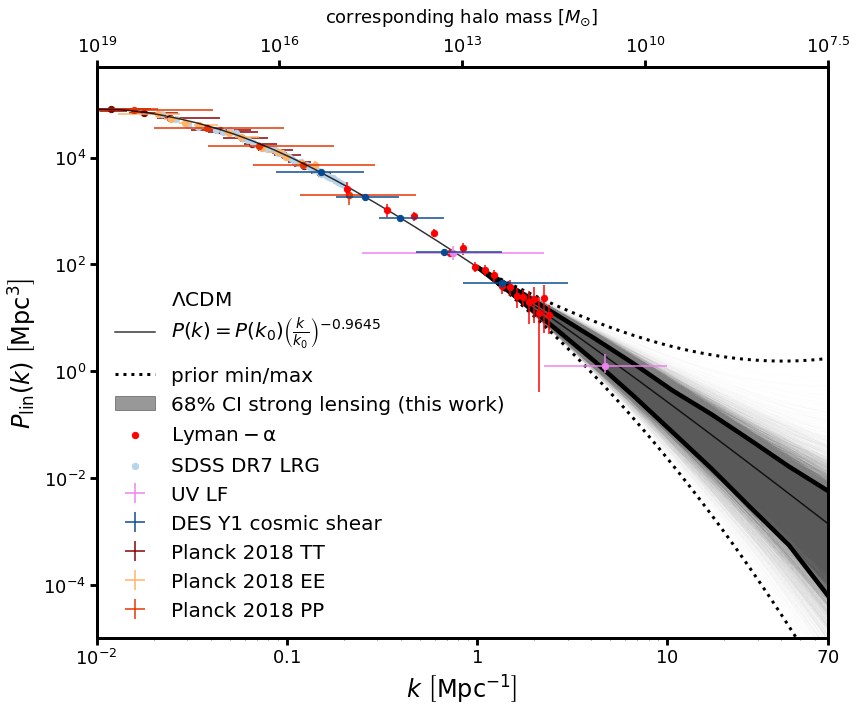

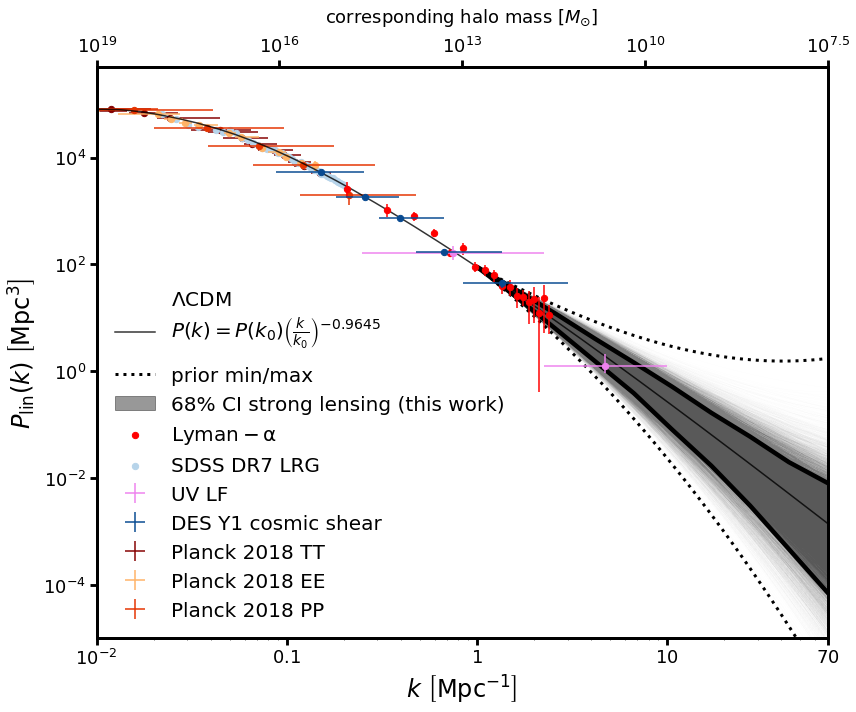

In [22]:
fig = plt.figure(1)
fig.set_size_inches(12, 10)
ax = plt.subplot(111)
pivot_scale = 1.0
make_reconstruction_figure(ax, pivot_scale, pk_ranges_pivot1, keval_pivot1, samples_ST_pivot1, median_ST_pivot1, lower_68_ST_pivot1, upper_68_ST_pivot1, save=False, save_name='')
plt.tight_layout() 
save_name = './figures_for_paper/main_figure_ST_pivot1.pdf'
plt.savefig(save_name)
save_name = './figures_for_paper/main_figure_ST_pivot1.jpg'
plt.savefig(save_name)
plt.show()

fig = plt.figure(2)
fig.set_size_inches(12, 10)
ax = plt.subplot(111)
make_reconstruction_figure(ax, pivot_scale, pk_ranges_pivot1, keval_pivot1, samples_B_pivot1, median_B_pivot1, lower_68_B_pivot1, upper_68_B_pivot1, save=False, save_name='')
plt.tight_layout() 
save_name = './figures_for_paper/main_figure_B_pivot1.pdf'
plt.savefig(save_name)
save_name = './figures_for_paper/main_figure_B_pivot1.jpg'
plt.savefig(save_name)

fig = plt.figure(3)
fig.set_size_inches(12, 10)
ax = plt.subplot(111)
make_reconstruction_figure(ax, pivot_scale, pk_ranges_pivot1, keval_pivot1, samples_R_pivot1, median_R_pivot1, lower_68_R_pivot1, upper_68_R_pivot1, save=False, save_name='')
plt.tight_layout() 
save_name = './figures_for_paper/main_figure_R_pivot1.pdf'
plt.savefig(save_name)
save_name = './figures_for_paper/main_figure_R_pivot1.jpg'
plt.savefig(save_name)



In [23]:
mfunc_model = 'shethTormen'
likelihood = qp_likelihoods_dict_pivot05[mfunc_model]
pk_ranges_pivot05 = qp_likelihoods_dict_pivot05[mfunc_model+'_ranges']
pivot_scale = 0.5
keval = np.logspace(np.log10(pivot_scale)+0.01, np.log10(70), 10)
samples_ST_pivot05 = qp_likelihoods_dict_pivot05[mfunc_model].sample(ncurves)
median_ST_pivot05, lower_68_ST_pivot05, upper_68_ST_pivot05 = confidence_band_at_k(keval, pk_ranges_pivot05, pivot_scale, likelihood)
print('done')

# mfunc_model = 'bhattacharya2011'
# likelihood = qp_likelihoods_dict_pivot05[mfunc_model]
# pk_ranges = qp_likelihoods_dict_pivot05[mfunc_model+'_ranges']
# samples_B_pivot05 = qp_likelihoods_dict_pivot05[mfunc_model].sample(ncurves)
# median_B_pivot05, lower_68_B_pivot05, upper_68_B_pivot05 = confidence_band_at_k(keval, pk_ranges_pivot05, pivot_scale, likelihood)
# print('done')

# mfunc_model = 'rodriguezPuebla2016'
# likelihood = qp_likelihoods_dict_pivot05[mfunc_model]
# pk_ranges = qp_likelihoods_dict_pivot05[mfunc_model+'_ranges']
# samples_R_pivot05 = qp_likelihoods_dict_pivot05[mfunc_model].sample(ncurves)
# median_R_pivot05, lower_68_R_pivot05, upper_68_R_pivot05 = confidence_band_at_k(keval, pk_ranges_pivot05, pivot_scale, likelihood)
# print('done')

sampling.... 10.0%
sampling.... 20.0%
sampling.... 30.0%
sampling.... 40.0%
sampling.... 50.0%
sampling.... 60.0%
sampling.... 70.0%
sampling.... 80.0%
sampling.... 90.0%
done


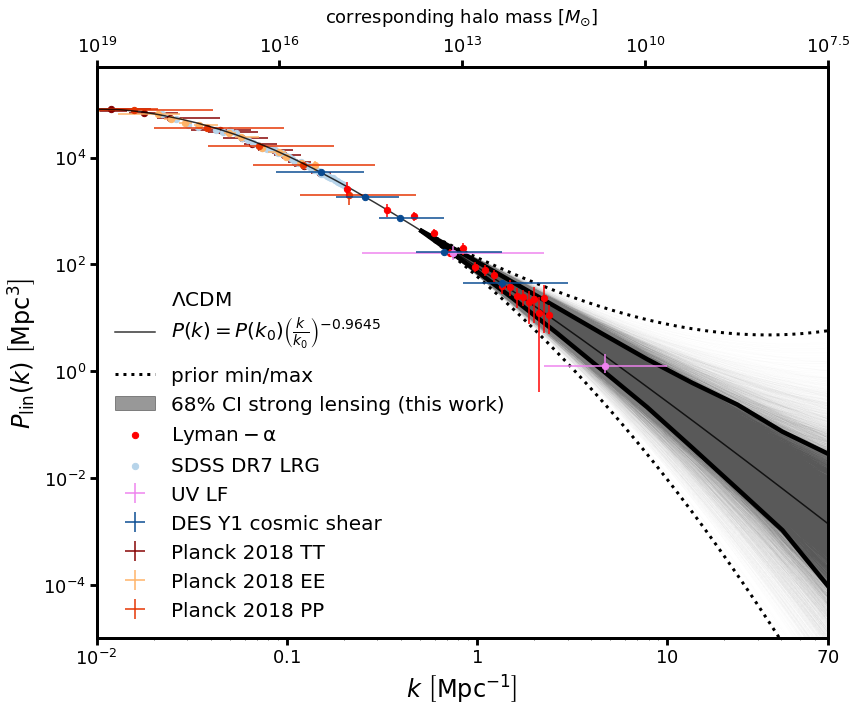

In [24]:
fig = plt.figure(1)
fig.set_size_inches(12, 10)
ax = plt.subplot(111)
pivot_scale = 0.5
make_reconstruction_figure(ax, pivot_scale, pk_ranges_pivot05, keval, samples_ST_pivot05, median_ST_pivot05, lower_68_ST_pivot05, upper_68_ST_pivot05, save=False, save_name='')
plt.tight_layout() 
save_name = './figures_for_paper/main_figure_ST_pivot05.pdf'
plt.savefig(save_name)
save_name = './figures_for_paper/main_figure_ST_pivot05.jpg'
plt.savefig(save_name)

# fig = plt.figure(2)
# fig.set_size_inches(12, 10)
# ax = plt.subplot(111)
# make_reconstruction_figure(ax, pivot_scale, pk_ranges_pivot05, keval, samples_B_pivot05, median_B_pivot05, lower_68_B_pivot05, upper_68_B_pivot05, save=False, save_name='')
# plt.tight_layout() 
# save_name = './figures_for_paper/main_figure_B_pivot05.pdf'
# plt.savefig(save_name)
# save_name = './figures_for_paper/main_figure_B_pivot05.jpg'
# plt.savefig(save_name)

# fig = plt.figure(3)
# fig.set_size_inches(12, 10)
# ax = plt.subplot(111)
# make_reconstruction_figure(ax, pivot_scale, pk_ranges_pivot05, keval, samples_R_pivot05, median_R_pivot05, lower_68_R_pivot05, upper_68_R_pivot05, save=False, save_name='')
# plt.tight_layout() 
# save_name = './figures_for_paper/main_figure_R_pivot05.pdf'
# plt.savefig(save_name)
# save_name = './figures_for_paper/main_figure_R_pivot05.jpg'
# plt.savefig(save_name)

In [25]:
mfunc_model = 'shethTormen'
likelihood = qp_likelihoods_dict_pivot01[mfunc_model]
pk_ranges_pivot01 = qp_likelihoods_dict_pivot01[mfunc_model+'_ranges']
pivot_scale = 0.1
keval = np.logspace(np.log10(pivot_scale)+0.01, np.log10(70), 10)
samples_ST_pivot01 = qp_likelihoods_dict_pivot01[mfunc_model].sample(ncurves)
k_plot_pivot01 = np.logspace(np.log10(0.1), np.log10(70), 200)
median_ST_pivot01, lower_68_ST_pivot01, upper_68_ST_pivot01 = confidence_band_at_k(keval, pk_ranges_pivot01, pivot_scale, likelihood)
print('done')

# mfunc_model = 'bhattacharya2011'
# likelihood = qp_likelihoods_dict_pivot01[mfunc_model]
# pk_ranges = qp_likelihoods_dict_pivot01[mfunc_model+'_ranges']
# samples_B_pivot01 = qp_likelihoods_dict_pivot01[mfunc_model].sample(ncurves)
# median_B_pivot01, lower_68_B_pivot01, upper_68_B_pivot01 = confidence_band_at_k(keval, pk_ranges_pivot01, pivot_scale, likelihood)
# print('done')

# mfunc_model = 'rodriguezPuebla2016'
# likelihood = qp_likelihoods_dict_pivot01[mfunc_model]
# pk_ranges = qp_likelihoods_dict_pivot01[mfunc_model+'_ranges']
# samples_R_pivot01 = qp_likelihoods_dict_pivot01[mfunc_model].sample(ncurves)
# median_R_pivot01, lower_68_R_pivot01, upper_68_R_pivot01 = confidence_band_at_k(keval, pk_ranges_pivot01, pivot_scale, likelihood)
# print('done')

sampling.... 10.0%
sampling.... 20.0%
sampling.... 30.0%
sampling.... 40.0%
sampling.... 50.0%
sampling.... 60.0%
sampling.... 70.0%
sampling.... 80.0%
sampling.... 90.0%
done


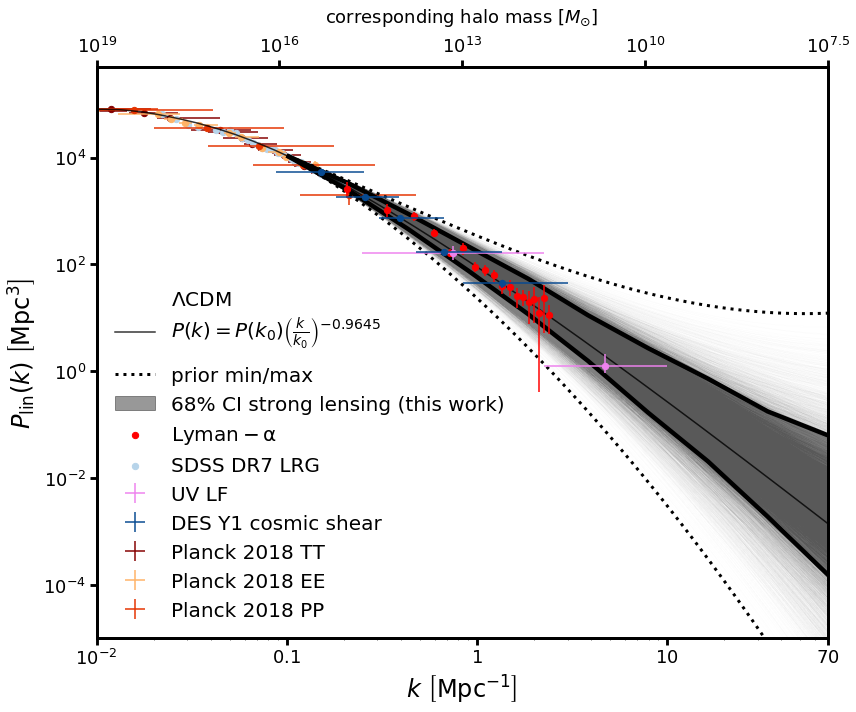

In [26]:
fig = plt.figure(1)
fig.set_size_inches(12, 10)
ax = plt.subplot(111)
pivot_scale = 0.1
make_reconstruction_figure(ax, pivot_scale, pk_ranges_pivot01, keval, samples_ST_pivot01, median_ST_pivot01, lower_68_ST_pivot01, upper_68_ST_pivot01, save=False, save_name='')
plt.tight_layout() 
save_name = './figures_for_paper/main_figure_ST_pivot01.pdf'
plt.savefig(save_name)
save_name = './figures_for_paper/main_figure_ST_pivot01.jpg'
plt.savefig(save_name)

# fig = plt.figure(2)
# fig.set_size_inches(12, 10)
# ax = plt.subplot(111)
# make_reconstruction_figure(ax, pivot_scale, pk_ranges_pivot01, keval, samples_B_pivot01, median_B_pivot01, lower_68_B_pivot01, upper_68_B_pivot01, save=False, save_name='')
# plt.tight_layout() 
# save_name = './figures_for_paper/main_figure_B_pivot01.pdf'
# plt.savefig(save_name)
# save_name = './figures_for_paper/main_figure_B_pivot01.jpg'
# plt.savefig(save_name)

# fig = plt.figure(3)
# fig.set_size_inches(12, 10)
# ax = plt.subplot(111)
# make_reconstruction_figure(ax, pivot_scale, pk_ranges_pivot01, keval, samples_R_pivot01, median_R_pivot01, lower_68_R_pivot01, upper_68_R_pivot01, save=False, save_name='')
# plt.tight_layout() 
# save_name = './figures_for_paper/main_figure_R_pivot01.pdf'
# plt.savefig(save_name)
# save_name = './figures_for_paper/main_figure_R_pivot01.jpg'
# plt.savefig(save_name)

[ 1.00739769  1.20207112  1.42025417  1.75863539  2.34649504  3.01789641
  3.91215163  6.06190178  9.33039564 12.63463392]


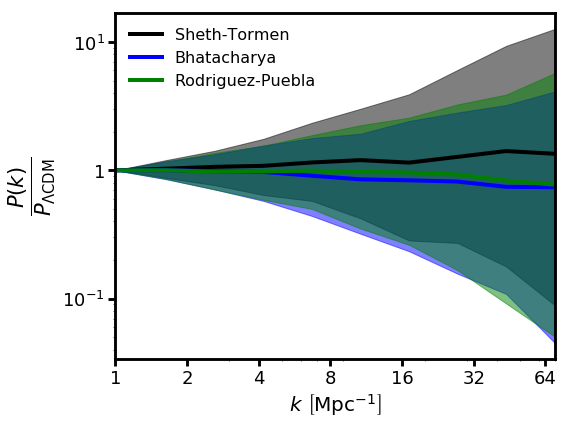

In [27]:
keval_pivot_1 = np.logspace(np.log10(1.0)+0.01, np.log10(70), 10)
fig = plt.figure(1)
fig.set_size_inches(8,6)
ax = plt.subplot(111)

pk_lcdm = sample_pk(0.9645, 0., 0., keval_pivot_1, 1.0)
ax.plot(keval_pivot_1, 10**median_ST_pivot1 / pk_lcdm, color='k', label='Sheth-Tormen', lw=4)
ax.plot(keval_pivot_1, 10**median_B_pivot1 / pk_lcdm, color='b', label='Bhatacharya', lw=4)
ax.plot(keval_pivot_1, 10**median_R_pivot1 / pk_lcdm, color='g', label='Rodriguez-Puebla', lw=4)

print(10**lower_68_ST_pivot1 / pk_lcdm)
ax.fill_between(keval_pivot_1, 10**lower_68_ST_pivot1 / pk_lcdm, 10**upper_68_ST_pivot1 / pk_lcdm, color='k', alpha=0.5)
ax.fill_between(keval_pivot_1, 10**lower_68_B_pivot1 / pk_lcdm, 10**upper_68_B_pivot1 / pk_lcdm, color='b', alpha=0.5)
ax.fill_between(keval_pivot_1, 10**lower_68_R_pivot1 / pk_lcdm, 10**upper_68_R_pivot1 / pk_lcdm, color='g', alpha=0.5)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xticks([1, 2, 4, 8, 16, 32, 64])
ax.set_xticklabels([1, 2, 4, 8, 16, 32, 64], fontsize=18)
ax.set_yticks([0.1, 1.0, 10.0])
ax.set_yticklabels([r'$10^{-1}$', r'$1$', r'$10^{1}$'], fontsize=18)
ax.legend(fontsize=16, loc=2, frameon=False)
ax.set_xlim(1, 70)
ax.set_ylabel(r'$\frac{P\left(k\right)}{P_{\rm{\Lambda CDM}}}$', fontsize=30)
ax.set_xlabel(r'$k \ \left[\rm{Mpc^{-1}}\right]$', fontsize=20)
plt.tight_layout()
save_name = './figures_for_paper/mfunc_model_comparison.pdf'
plt.savefig(save_name)



In [30]:
f = open('./interpolated_pq_likelihoods/Pk_likelihood_'+mfunc_model+'_pivot1'+'_sigmasub025', 'rb')
qp_likelihood_sigmasub025 = pickle.load(f)
mfunc_model = 'shethTormen'
pivot_scale = 1.0
pivot_string, qp_ranges = string_ranges_for_pivot(1.0)
keval = np.logspace(np.log10(pivot_scale)+0.01, np.log10(70), 10)
samples_ST_pivot1_sigmasub025 = qp_likelihood_sigmasub025.sample(ncurves)
k_plot = np.logspace(np.log10(1.0), np.log10(70), 200)
median_ST_pivot1_sigmasub025, lower_68_ST_pivot1_sigmasub025, upper_68_ST_pivot1_sigmasub025 = confidence_band_at_k(keval, qp_ranges, pivot_scale, qp_likelihood_sigmasub025)
print('done')



sampling.... 10.0%
sampling.... 20.0%
sampling.... 30.0%
sampling.... 40.0%
sampling.... 50.0%
sampling.... 60.0%
sampling.... 70.0%
sampling.... 80.0%
sampling.... 90.0%
done


[ 1.00739769  1.20207112  1.42025417  1.75863539  2.34649504  3.01789641
  3.91215163  6.06190178  9.33039564 12.63463392]


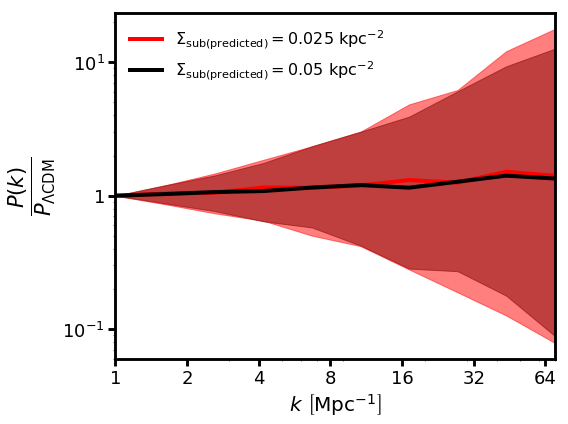

In [33]:
keval_pivot_1 = np.logspace(np.log10(1.0)+0.01, np.log10(70), 10)
fig = plt.figure(1)
fig.set_size_inches(8,6)
ax = plt.subplot(111)

pk_lcdm = sample_pk(0.9645, 0., 0., keval_pivot_1, 1.0)
ax.plot(keval_pivot_1, 10**median_ST_pivot1_sigmasub025 / pk_lcdm, color='r', label=r'$\Sigma_{\rm{sub(predicted)}} = 0.025 \ \rm{kpc^{-2}}$', lw=4)
ax.plot(keval_pivot_1, 10**median_ST_pivot1 / pk_lcdm, color='k', label=r'$\Sigma_{\rm{sub(predicted)}} = 0.05 \ \rm{kpc^{-2}}$', lw=4)

print(10**lower_68_ST_pivot1 / pk_lcdm)
ax.fill_between(keval_pivot_1, 10**lower_68_ST_pivot1 / pk_lcdm, 10**upper_68_ST_pivot1 / pk_lcdm, color='k', alpha=0.5)
ax.fill_between(keval_pivot_1, 10**lower_68_ST_pivot1_sigmasub025 / pk_lcdm, 10**upper_68_ST_pivot1_sigmasub025 / pk_lcdm, color='r', alpha=0.5)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xticks([1, 2, 4, 8, 16, 32, 64])
ax.set_xticklabels([1, 2, 4, 8, 16, 32, 64], fontsize=18)
ax.set_yticks([0.1, 1.0, 10.0])
ax.set_yticklabels([r'$10^{-1}$', r'$1$', r'$10^{1}$'], fontsize=18)
ax.legend(fontsize=16, loc=2, frameon=False)
ax.set_xlim(1, 70)
ax.set_ylabel(r'$\frac{P\left(k\right)}{P_{\rm{\Lambda CDM}}}$', fontsize=30)
ax.set_xlabel(r'$k \ \left[\rm{Mpc^{-1}}\right]$', fontsize=20)
plt.tight_layout()
save_name = './figures_for_paper/sigamsub_model_comparison.pdf'
plt.savefig(save_name)



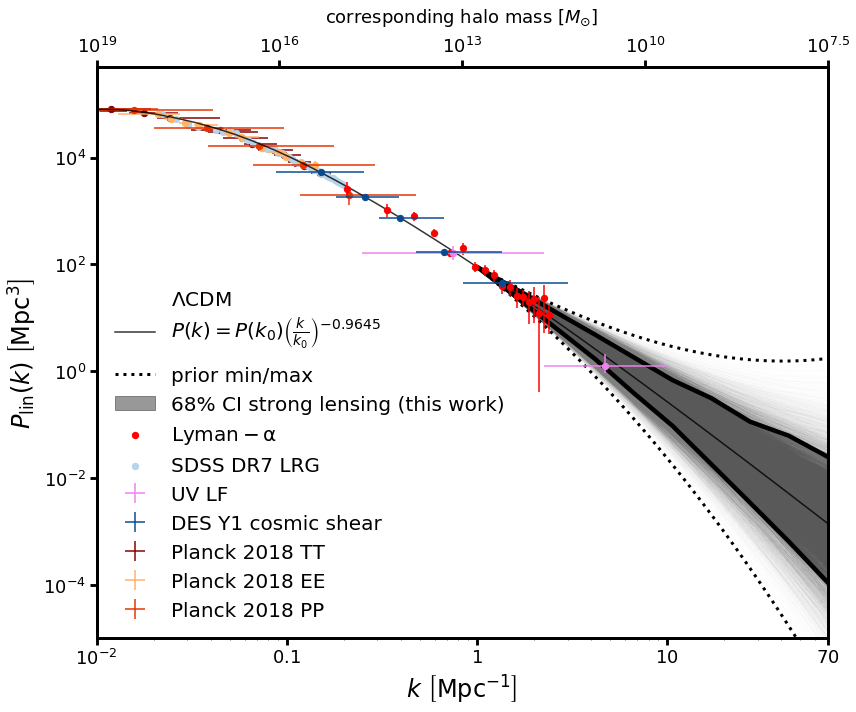

In [34]:
fig = plt.figure(1)
fig.set_size_inches(12, 10)
ax = plt.subplot(111)
pivot_scale = 1.0
make_reconstruction_figure(ax, pivot_scale, qp_ranges, keval, samples_ST_pivot1_sigmasub025, median_ST_pivot1_sigmasub025, lower_68_ST_pivot1_sigmasub025, upper_68_ST_pivot1_sigmasub025, save=False, save_name='')
plt.tight_layout() 
save_name = './figures_for_paper/main_figure_ST_pivot1_sigmasub025.pdf'
plt.savefig(save_name)
save_name = './figures_for_paper/main_figure_ST_pivot1_sigmasub025.jpg'
plt.savefig(save_name)

In [36]:
N = 5000
ndraw = 10000
mfunc_model = 'shethTormen'
pk_ranges_pivot1 = qp_likelihoods_dict_pivot1[mfunc_model+'_ranges']
samples_sigmasub_05 = np.empty((N, 3))
samples_sigmasub_05[:, 0] = np.random.uniform(pk_ranges_pivot1[0][0], pk_ranges_pivot1[0][1], N)
samples_sigmasub_05[:, 1] = np.random.uniform(pk_ranges_pivot1[1][0], pk_ranges_pivot1[1][1], N)
samples_sigmasub_05[:, 2] = np.random.uniform(pk_ranges_pivot1[2][0], pk_ranges_pivot1[2][1], N)
likelihood = qp_likelihoods_dict_pivot1[mfunc_model]
sample_weights = [likelihood(samples_sigmasub_05[i,:]) for i in range(0, N)]

k_center_1 = 10
k_center_2 = 25
k_center_3 = 50

_, likelihood_10, x_10, _, _ = Pk_from_likelihood(samples_sigmasub_05, sample_weights, 1.0, k_center_1, n_max=ndraw,
                           nbins=20, x_range=None, prior_sample_factor=15000, edge_cut_factor=20,
                           ns_fixed_above_pivot=0.9645)
likelihood_samples_10 = []
likelihood_10_interp = interp1d(x_10, likelihood_10)
while len(likelihood_samples_10) < 1000:
    u = np.random.rand()
    x = np.random.uniform(np.min(x_10), np.max(x_10))
    p = likelihood_10_interp(x)
    if p >= u:
        likelihood_samples_10.append(x)
    
_, likelihood_25, x_25, _, _ = Pk_from_likelihood(samples_sigmasub_05, sample_weights, 1.0, k_center_2, n_max=ndraw,
                           nbins=20, x_range=None, prior_sample_factor=15000, edge_cut_factor=20,
                           ns_fixed_above_pivot=0.9645)
likelihood_samples_25 = []
likelihood_25_interp = interp1d(x_25, likelihood_25)
while len(likelihood_samples_25) < 1000:
    u = np.random.rand()
    x = np.random.uniform(np.min(x_25), np.max(x_25))
    p = likelihood_25_interp(x)
    if p >= u:
        likelihood_samples_25.append(x)
        
_, likelihood_50, x_50, _, _ = Pk_from_likelihood(samples_sigmasub_05, sample_weights, 1.0, k_center_3, n_max=ndraw,
                           nbins=20, x_range=None, prior_sample_factor=15000, edge_cut_factor=20,
                           ns_fixed_above_pivot=0.9645)
likelihood_samples_50 = []
likelihood_50_interp = interp1d(x_50, likelihood_50)
while len(likelihood_samples_50) < 1000:
    u = np.random.rand()
    x = np.random.uniform(np.min(x_50), np.max(x_50))
    p = likelihood_50_interp(x)
    if p >= u:
        likelihood_samples_50.append(x)

pk_lcdm_1 = np.log10(sample_pk(0.9645, 0., 0., k_center_1, 1.0))
pk_lcdm_2 = np.log10(sample_pk(0.9645, 0., 0., k_center_2, 1.0))
pk_lcdm_3 = np.log10(sample_pk(0.9645, 0., 0., k_center_3, 1.0))

r = (10**np.array(likelihood_samples_10)/10**pk_lcdm_1)
mu, [mu_minus_lower, upper_minus_mu] = compute_confidence_intervals(np.log10(r), 1)
print(mu, mu_minus_lower, upper_minus_mu)
r = 10**np.array(likelihood_samples_25)/10**pk_lcdm_2
mu, [mu_minus_lower, upper_minus_mu] = compute_confidence_intervals(np.log10(r), 1)
print(mu, mu_minus_lower, upper_minus_mu)
r = 10**np.array(likelihood_samples_50)/10**pk_lcdm_3
mu, [mu_minus_lower, upper_minus_mu] = compute_confidence_intervals(np.log10(r), 1)
print(mu, mu_minus_lower, upper_minus_mu)

0.08818487921322178 0.4618682755635714 0.38772920511860687
0.08746107483855897 0.6746287658830912 0.6496853461390721
0.08251333786611714 0.9803759851761418 0.7994300654223776


In [37]:
samples_sigmasub_05 = np.empty((N, 3))
samples_sigmasub_05[:, 0] = np.random.uniform(pk_ranges_pivot1[0][0], pk_ranges_pivot1[0][1], N)
samples_sigmasub_05[:, 1] = np.random.uniform(pk_ranges_pivot1[1][0], pk_ranges_pivot1[1][1], N)
samples_sigmasub_05[:, 2] = np.random.uniform(pk_ranges_pivot1[2][0], pk_ranges_pivot1[2][1], N)
sample_weights = [qp_likelihood_sigmasub025(samples_sigmasub_05[i,:]) for i in range(0, N)]

_, likelihood_10, x_10, _, _ = Pk_from_likelihood(samples_sigmasub_05, sample_weights, 1.0, k_center_1, n_max=ndraw,
                           nbins=20, x_range=None, prior_sample_factor=15000, edge_cut_factor=20,
                           ns_fixed_above_pivot=0.9645)
likelihood_samples_10 = []
likelihood_10_interp = interp1d(x_10, likelihood_10)
while len(likelihood_samples_10) < 1000:
    u = np.random.rand()
    x = np.random.uniform(np.min(x_10), np.max(x_10))
    p = likelihood_10_interp(x)
    if p >= u:
        likelihood_samples_10.append(x)
    
_, likelihood_25, x_25, _, _ = Pk_from_likelihood(samples_sigmasub_05, sample_weights, 1.0, k_center_2, n_max=ndraw,
                           nbins=20, x_range=None, prior_sample_factor=15000, edge_cut_factor=20,
                           ns_fixed_above_pivot=0.9645)
likelihood_samples_25 = []
likelihood_25_interp = interp1d(x_25, likelihood_25)
while len(likelihood_samples_25) < 1000:
    u = np.random.rand()
    x = np.random.uniform(np.min(x_25), np.max(x_25))
    p = likelihood_25_interp(x)
    if p >= u:
        likelihood_samples_25.append(x)
        
_, likelihood_50, x_50, _, _ = Pk_from_likelihood(samples_sigmasub_05, sample_weights, 1.0, k_center_3, n_max=ndraw,
                           nbins=20, x_range=None, prior_sample_factor=15000, edge_cut_factor=20,
                           ns_fixed_above_pivot=0.9645)
likelihood_samples_50 = []
likelihood_50_interp = interp1d(x_50, likelihood_50)
while len(likelihood_samples_50) < 1000:
    u = np.random.rand()
    x = np.random.uniform(np.min(x_50), np.max(x_50))
    p = likelihood_50_interp(x)
    if p >= u:
        likelihood_samples_50.append(x)

pk_lcdm_1 = np.log10(sample_pk(0.9645, 0., 0., k_center_1, 1.0))
pk_lcdm_2 = np.log10(sample_pk(0.9645, 0., 0., k_center_2, 1.0))
pk_lcdm_3 = np.log10(sample_pk(0.9645, 0., 0., k_center_3, 1.0))

r = (10**np.array(likelihood_samples_10)/10**pk_lcdm_1)
mu, [mu_minus_lower, upper_minus_mu] = compute_confidence_intervals(np.log10(r), 1)
print(mu, mu_minus_lower, upper_minus_mu)
r = 10**np.array(likelihood_samples_25)/10**pk_lcdm_2
mu, [mu_minus_lower, upper_minus_mu] = compute_confidence_intervals(np.log10(r), 1)
print(mu, mu_minus_lower, upper_minus_mu)
r = 10**np.array(likelihood_samples_50)/10**pk_lcdm_3
mu, [mu_minus_lower, upper_minus_mu] = compute_confidence_intervals(np.log10(r), 1)
print(mu, mu_minus_lower, upper_minus_mu)

0.07782159644937978 0.46190456185046336 0.4994743836119818
0.17345270000530755 0.7842833171877114 0.7757421105716432
0.19250170912574727 1.111688254332252 0.9472141089262733


In [80]:
N = 2000
ndraw = 5000
mfunc_model = 'shethTormen'

pk_ranges_pivot1 = qp_likelihoods_dict_pivot1[mfunc_model+'_ranges']
qp_samples_sigmasub_05 = qp_likelihoods_dict_pivot1[mfunc_model].sample(N)
k_center_1 = 10
k_center_2 = 25
k_center_3 = 50

pk_10 = np.log10([sample_pk(qp_samples_sigmasub_05[i,0], qp_samples_sigmasub_05[i,1], qp_samples_sigmasub_05[i,2], k_center_1, 1.0) for i in range(0, N)])
pk_25 = np.log10([sample_pk(qp_samples_sigmasub_05[i,0], qp_samples_sigmasub_05[i,1], qp_samples_sigmasub_05[i,2], k_center_2, 1.0) for i in range(0, N)])
pk_50 = np.log10([sample_pk(qp_samples_sigmasub_05[i,0], qp_samples_sigmasub_05[i,1], qp_samples_sigmasub_05[i,2], k_center_3, 1.0) for i in range(0, N)])

print(np.cov([pk_10, pk_25, pk_50]))

sampling.... 10.0%
sampling.... 20.0%
sampling.... 30.0%
sampling.... 40.0%
sampling.... 50.0%
sampling.... 60.0%
sampling.... 70.0%
sampling.... 80.0%
sampling.... 90.0%
[[0.09277253 0.14854053 0.19769307]
 [0.14854053 0.25282139 0.34941699]
 [0.19769307 0.34941699 0.49375464]]
